# tBLASTn in arthropods

In [2]:
import time
import os

In [3]:
clustered_seq = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/Orthomyxo-PB1-CD-HIT-updated.clstr"
fasta_path = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/Orthomyxo-PB1-HHMER-updated.fasta"

Extracting representative IDs from each cluster.

In [4]:
with open(clustered_seq, "r") as clusters:
    c = clusters.readlines()
rep_ID_lines = [e for e in c if e.endswith("*\n")]
rep_IDs = [e.split(", >")[1].split("...")[0] for e in rep_ID_lines]
rep_IDs

['QPN36968.1',
 'UQT02520.1',
 'QMP82367.1',
 'UVF62194.1',
 'QMP82195.1',
 'QMP82285.1',
 'QMP82388.1',
 'QMP82402.1',
 'QMP82403.1',
 'QMP82112.1',
 'QMP82168.1',
 'QMP82344.1',
 'QMP82362.1',
 'QMP82338.1',
 'QPZ88437.1',
 'UMO75733.1',
 'QED21504.1',
 'UPT53723.1',
 'AVR52572.1',
 'QMP82355.1',
 'AVR52567.1',
 'UUG74181.1',
 'UMO75734.1',
 'AJG39094.1',
 'QMP82147.1',
 'QPL15381.1',
 'QMP82248.1',
 'UMO75726.1',
 'QMP82204.1',
 'QPL15288.1',
 'QPL15340.1',
 'UMO75713.1',
 'UUG74233.1',
 'QPL15368.1',
 'UMO75705.1',
 'UMO75722.1',
 'QMP82272.1',
 'URQ09139.1',
 'QIJ70032.1',
 'QMP82229.1',
 'QWC36487.1',
 'UUG74184.1',
 'AJG39084.1',
 'UMO75717.1',
 'DAZ85673.1',
 'AJG39092.1',
 'AJG39088.1',
 'QDK54862.1',
 'QEM39320.1',
 'AJG39089.1',
 'QPZ88434.1',
 'AJG39086.1',
 'QKK82920.1',
 'QPL15369.1',
 'QPZ88431.1',
 'UUG74234.1',
 'ACY56282.1',
 'UMO75729.1',
 'UYL95486.1',
 'ASR92124.1',
 'UUT42596.1',
 'QPN36942.1',
 'URY50684.1',
 'UUT42625.1',
 'AIY25030.1',
 'QOE76794.1',
 'DAZ91106

In [6]:
len(rep_IDs)

109

Moving selected sequences to a new directory.

In [8]:
import shutil

source_folder = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/Orthomyxoviridae-PB1/"
destination_folder = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/PB1-clusters/"

for file in rep_IDs:
    source = source_folder + f"{file}.fasta"
    destination = destination_folder + f"{file}.fasta"
    shutil.copy(source, destination)

# Building nt database for local BLAST

If the database is alreade built, skip to [tBLASTn](#running-local-blast).

Following https://bioinf.shenwei.me/taxonkit/tutorial/#extract-all-protein-sequences-of-specific-taxons-from-the-ncbi-nr-database tutorial

Steps:

### 1. Setting up taxonkit:
1.1 Downloаd taxonkit

1.2 Downloading and decompressing taxdump.tar.gz: ftp://ftp.ncbi.nih.gov/pub/taxonomy/taxdump.tar.gz (as recommended https://bioinf.shenwei.me/taxonkit/download/)


In [ ]:
%%bash
curl 'ftp://ftp.ncbi.nih.gov/pub/taxonomy/taxdump.tar.gz' --output ./taxdump.tar.gz

In [ ]:
%%bash
tar -zxvf taxdump.tar.gz

1.3 Copying some of the taxdump files to `$HOME/.taxonkit` directory.

In [ ]:
%%bash
cp names.dmp nodes.dmp delnodes.dmp merged.dmp $HOME/.taxonkit

### 2. Writing Arthropoda IDs to text file.

In [ ]:
%%bash
id=6656
taxonkit list --ids $id --indent "" > $id.taxid.txt
wc -l $id.taxid.txt

  925155 6656.taxid.txt


### 3. Retrieving target accessions:

3.1 Downloading `nucl_gb.accession2taxid.gz` file for nt database (or `prot.accession2taxid.gz` for nr db) from NCBI server: ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/accession2taxid/

Note: specify the name of the output file in curl command (the name of directory isn't enough).

In [ ]:
%%bash
# nt database
curl 'ftp://ftp.ncbi.nih.gov/pub/taxonomy/accession2taxid/nucl_gb.accession2taxid.gz' --output /Volumes/WD_BLACK/Brigita/nt/nucl_gb.accession2taxid.gz

In [ ]:
%%bash
# nr database
curl 'ftp://ftp.ncbi.nih.gov/pub/taxonomy/accession2taxid/prot.accession2taxid.gz' --output /Volumes/EXTERNAL/Orthomyxoviridae/prot.accession2taxid.gz

3.2 Retrieving target accessions (taxid -> accession numbers).

In [4]:
%%bash
# nt database
source ~/.bashrc
pigz -dc /Volumes/WD_BLACK/Brigita/nt/nucl_gb.accession2taxid.gz \
    | csvtk grep -t -f taxid -P /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.txids \
    | csvtk cut -t -f accession.version,taxid \
    | sed 1d \
    > /Volumes/WD_BLACK/Brigita/nt/6656.acc2taxid.txt

cut -f 1 /Volumes/WD_BLACK/Brigita/nt/6656.acc2taxid.txt > /Volumes/WD_BLACK/Brigita/nt/6656.acc.txt

wc -l /Volumes/WD_BLACK/Brigita/nt/6656.acc.txt

 34241660 /Volumes/WD_BLACK/Brigita/nt/6656.acc.txt


In [ ]:
%%bash
# nr database
pigz -dc /Volumes/EXTERNAL/Orthomyxoviridae/prot.accession2taxid.gz \
    | csvtk grep -t -f taxid -P /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.taxid.txt \
    | csvtk cut -t -f accession.version,taxid \
    | sed 1d \
    > /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.acc2taxid.txt

cut -f 1 /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.acc2taxid.txt > /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.acc.txt

wc -l /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.acc.txt

 19035895 /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/6656.acc.txt


### 4. Retrieving FASTA sequences from pre-formated blastdb.

4.1 Downloading databases:

In [ ]:
%%bash 
# nt database
curl -O "ftp://ftp.ncbi.nih.gov/blast/db/nt_euk.[00-100].tar.gz" --output-dir /Volumes/WD_BLACK/Brigita/nt/pre_nt

In [ ]:
%%bash
ls nt_euk.*.tar.gz | xargs -I % tar -zxv -f % -C /Volumes/WD_BLACK/Brigita/nt/extracted

In [ ]:
%%bash
# nr database
curl -O "ftp://ftp.ncbi.nih.gov/blast/db/nr.[00-100].tar.gz" --output-dir /Volumes/EXTERNAL/Orthomyxoviridae/blast

In [ ]:
%%bash
ls nr.*.tar.gz | xargs -I % tar -zxv -f % -C /Volumes/EXTERNAL/Orthomyxoviridae/blast/extracted/

Exporting nt_euk.fa (nr.fa) from pre-formated blastdb. 

In [ ]:
%%bash
blastdbcmd -db /Volumes/WD_BLACK/Brigita/nt/extracted/nt_euk -dbtype nucl -entry all -outfmt "%f" -out - | pigz -c > /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.fa.gz

In [ ]:
%%bash
cd /Volumes/EXTERNAL/Orthomyxoviridae/blast/nr
blastdbcmd -db nr -dbtype prot -entry all -outfmt "%f" -out - | pigz -c > /Volumes/EXTERNAL/Orthomyxoviridae/nr.fa.gz

Installing seqkit.

The script below was written as a text file and run from a command line: bash filter-sequence.sh 

Extracting *Arthropoda* sequences from the entire database.

In [ ]:
%%bash
# nt database
time cat <(echo) <(pigz -dc /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.fa.gz) \
    | perl -e 'BEGIN{ $/ = "\n>"; <>; } while(<>){s/>$//;  $i = index $_, "\n"; $h = substr $_, 0, $i; $s = substr $_, $i+1; if ($h !~ />/) { print ">$_"; next; }; $h = ">$h"; while($h =~ />([^ ]+ .+?) ?(?=>|$)/g){ $h1 = $1; $h1 =~ s/^\W+//; print ">$h1\n$s";} } ' \
    | seqkit grep -f /Volumes/WD_BLACK/Brigita/nt/6656.acc.txt -o /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656.fa.gz

In [ ]:
%%bash
#nr database
time cat <(echo) <(pigz -dc /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.fa.gz) \
    | perl -e 'BEGIN{ $/ = "\n>"; <>; } while(<>){s/>$//;  $i = index $_, "\n"; $h = substr $_, 0, $i; $s = substr $_, $i+1; if ($h !~ />/) { print ">$_"; next; }; $h = ">$h"; while($h =~ />([^ ]+ .+?) ?(?=>|$)/g){ $h1 = $1; $h1 =~ s/^\W+//; print ">$h1\n$s";} } ' \
    | seqkit grep -f /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/6656.acc.txt -o /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656.fa.gz

Counting sequences.

In [ ]:
%%bash
wc -l /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/6656.acc.txt
pigz -dc /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656.fa.gz | grep '^>' -c

10746263


Formatting BLAST database.

In [ ]:
%%bash
# nt database
pigz -dc /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656.fa.gz > /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656.fa

In [ ]:
%%bash
# nt database
makeblastdb -parse_seqids -in /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656.fa -dbtype nucl -out /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656

Output:

>Building a new DB, current time: 09/06/2023 17:52:16\
>New DB name:   /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656\
>New DB title:  /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656.fa\
>Sequence type: Nucleotide\
>Keep MBits: T\
>Maximum file size: 3000000000B\
>Adding sequences from FASTA; added 17068454 sequences in 9733.49 seconds.

In [9]:
%%bash
# nr database
pigz -dc /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656.fa.gz > /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656.fa

In [10]:
%%bash
# nr database
makeblastdb -parse_seqids -in /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656.fa -dbtype prot -out /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656



Building a new DB, current time: 08/16/2023 11:22:29
New DB name:   /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656
New DB title:  /Volumes/WD_BLACK/Brigita/Orthomyxoviridae/nr.6656.fa
Sequence type: Protein
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 10746263 sequences in 509.398 seconds.




# Running local BLAST.

Database (-db): nt/6656/nt_euk.6656\
E-value (-evalue): 1e-6\
CPUs (-num_threads): 8\
Number of hits (-max_target_seqs): 1000\
Output format (-outfmt): 5 (output is written in XML)

In [ ]:
%%bash
# BLASTing 20 sequences
time tblastn -db nt/6656/nt_euk.6656 -query PB1-20seq.fasta -out PB1-20tblastn.xml -evalue 1e-6 -num_threads 8 -max_target_seqs 1000 -outfmt 5

In [ ]:
%%bash
#test run
tblastn -db /Volumes/WD_BLACK/Brigita/nt/6656/nt_euk.6656 -query /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/blast-test.fasta -out /Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/blast-result2 -evalue 1e-6 -num_threads 4 -max_target_seqs 1000 -outfmt 5

Another way to download nt database:

In [ ]:
%%bash 
update_blastdb.pl --decompress nt

# Analyzing hits

In [4]:
import pandas as pd
import numpy as np
from Bio import SearchIO

Exploring data (can be deleted later).

In [41]:
BLAST_results_20 = SearchIO.parse("/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/BLAST_PB1/PB1-20tblastn.xml", "blast-xml")
hits_total = []
for query in BLAST_results_20:
    print(query.id)
    hits = []
    for hit in query:
        hits.append(hit.id)
    hits_total.append(len(hits))
    print(f"Number of hits: ", len(hits))
    print("--------------------------")

print(sum(hits_total))

AAA42968.1
Number of hits:  259
--------------------------
AAC25959.1
Number of hits:  249
--------------------------
AAL67962.1
Number of hits:  13
--------------------------
AAU94857.1
Number of hits:  306
--------------------------
ACY56282.1
Number of hits:  640
--------------------------
AED98371.1
Number of hits:  262
--------------------------
AIY25030.1
Number of hits:  630
--------------------------
AJG39084.1
Number of hits:  646
--------------------------
AJG39085.1
Number of hits:  588
--------------------------
AJG39086.1
Number of hits:  672
--------------------------
AJG39088.1
Number of hits:  673
--------------------------
AJG39089.1
Number of hits:  672
--------------------------
AJG39092.1
Number of hits:  651
--------------------------
AJG39094.1
Number of hits:  646
--------------------------
AJG39096.1
Number of hits:  685
--------------------------
ALJ78713.1
Number of hits:  268
--------------------------
APP91612.1
Number of hits:  269
-------------------------

In [7]:
BLAST_results_20 = SearchIO.parse("/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/BLAST_PB1/PB1-20tblastn.xml", "blast-xml")
count = 0
for query in BLAST_results_20:
    print(query.description)
    for hit in query:
        count += 1
        hsps = []
        for hsp in hit:
            hsps.append(hsp)
        print(f"{count} Number of HSPs for {hit.id}: ", len(hsps)) 
    print("--------------------------")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/BLAST_PB1/PB1-20tblastn.xml'

### **Extracting queries and hits from BLAST XML files.**

Creating a list with accession numbers of queries (viral PB1 sequences).

In [8]:
BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

PB1_20 = [query.id for query in BLAST_results_20]
PB1_89 = [query.id for query in BLAST_results_89]
PB1 = PB1_20 + PB1_89

print(len(PB1))

109


Extracting all hits from XML files.

In [9]:
BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
hits_20 = []
for query in BLAST_results_20:
    hits = []
    for hit in query:
        hit_id = hit.id.split("|")[1]
        hits.append(hit_id)
    hits_20.append(hits)
print(hits_20)

[['OW052077.1', 'OX421934.1', 'OX411715.1', 'OX382229.1', 'OU342663.1', 'OY292434.1', 'LR990212.1', 'OV656855.1', 'OV121058.1', 'FR990001.1', 'OU744810.1', 'OW388277.2', 'OU426947.1', 'OX424458.1', 'OU026114.1', 'OU974029.1', 'OX419599.1', 'OX421465.1', 'OX382355.1', 'OW203721.1', 'OY560206.1', 'OW971904.1', 'OW052072.1', 'LR990280.1', 'OY039093.1', 'OU612012.1', 'OX243865.1', 'OX402555.1', 'OX387918.1', 'OU963894.1', 'OY365787.1', 'OX419725.1', 'OX465245.1', 'OX421890.1', 'OU745266.1', 'OU452198.1', 'OX374634.1', 'OU342464.1', 'OU612081.1', 'LR990192.1', 'OX101744.1', 'OW443294.2', 'LR991043.1', 'OX387434.1', 'OX384531.1', 'OY294033.1', 'OW052003.1', 'OX419582.1', 'OX335686.1', 'OX421221.1', 'OX276440.1', 'OX376307.1', 'LR990246.1', 'OV281311.1', 'OX392509.1', 'OW285216.1', 'LR990971.1', 'OX438886.1', 'OX465478.1', 'OX376305.1', 'LR990852.1', 'OU612038.1', 'OX382357.1', 'OU785243.1', 'OY039083.1', 'OW121784.1', 'OU342482.1', 'OX421869.1', 'OU426919.1', 'OU015575.1', 'OU343118.1', 'OU0

In [10]:
len(hits_20)

20

In [11]:
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")
hits_89 = []
for query in BLAST_results_89:
    hits = []
    for hit in query:
        hit_id = hit.id.split("|")[1]
        hits.append(hit_id)
    hits_89.append(hits)
print(hits_89)

[['LR990212.1', 'OX421890.1', 'OX376305.1', 'OU452198.1', 'OU342663.1', 'OU015512.1', 'OW052072.1', 'OU426932.1', 'OU974029.1', 'OX384531.1', 'OX382355.1', 'OX387918.1', 'OX101721.1', 'OY294061.1', 'OX465245.1', 'OU015575.1', 'OX387434.1', 'OX421397.1', 'OU612081.1', 'OU026083.1', 'OU426919.1', 'OW052077.1', 'OX374634.1', 'OW285216.1', 'OW964569.2', 'OX637540.1', 'OX243865.1', 'OY292434.1', 'OD584463.1', 'OX382229.1', 'OU342954.1', 'OX419599.1', 'OX421934.1', 'OX411715.1', 'OY720162.1', 'OX387435.1', 'OX369255.1', 'OX421465.1', 'OU343118.1', 'OU342464.1', 'OW203987.1', 'OU426947.1', 'OW388147.1', 'LR990192.1', 'OX276440.1', 'OX384041.1', 'OY560206.1', 'OU785243.1', 'OU342946.1', 'OW203721.1', 'OX376307.1', 'OW052003.1', 'OU026114.1', 'OX457144.1', 'OV121058.1', 'OU744810.1', 'OY293313.1', 'OV656855.1', 'OX419742.1', 'OW964551.2', 'OX442329.1', 'OY039093.1', 'OX411315.1', 'OX419582.1', 'OX421463.1', 'OU342482.1', 'OE843393.1', 'OX101744.1', 'OU538821.1', 'LR990971.1', 'FR990001.1', 'OX3

In [12]:
print(len(hits_89))

89


In [13]:
hits = hits_20 + hits_89
print(len(hits))

109


Writing query IDs into a PB1 list.

In [14]:
PB1_repeats = []

for i in range(len(PB1)):
    repeats = len(hits[i])
    for r in range(repeats):
        PB1_repeats.append(PB1[i])

PB1_repeats

['AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968.1',
 'AAA42968

In [15]:
len(PB1_repeats)

56188

Unnesting hits list.

In [16]:
HITS = sum(hits, [])
print(HITS)

['OW052077.1', 'OX421934.1', 'OX411715.1', 'OX382229.1', 'OU342663.1', 'OY292434.1', 'LR990212.1', 'OV656855.1', 'OV121058.1', 'FR990001.1', 'OU744810.1', 'OW388277.2', 'OU426947.1', 'OX424458.1', 'OU026114.1', 'OU974029.1', 'OX419599.1', 'OX421465.1', 'OX382355.1', 'OW203721.1', 'OY560206.1', 'OW971904.1', 'OW052072.1', 'LR990280.1', 'OY039093.1', 'OU612012.1', 'OX243865.1', 'OX402555.1', 'OX387918.1', 'OU963894.1', 'OY365787.1', 'OX419725.1', 'OX465245.1', 'OX421890.1', 'OU745266.1', 'OU452198.1', 'OX374634.1', 'OU342464.1', 'OU612081.1', 'LR990192.1', 'OX101744.1', 'OW443294.2', 'LR991043.1', 'OX387434.1', 'OX384531.1', 'OY294033.1', 'OW052003.1', 'OX419582.1', 'OX335686.1', 'OX421221.1', 'OX276440.1', 'OX376307.1', 'LR990246.1', 'OV281311.1', 'OX392509.1', 'OW285216.1', 'LR990971.1', 'OX438886.1', 'OX465478.1', 'OX376305.1', 'LR990852.1', 'OU612038.1', 'OX382357.1', 'OU785243.1', 'OY039083.1', 'OW121784.1', 'OU342482.1', 'OX421869.1', 'OU426919.1', 'OU015575.1', 'OU343118.1', 'OU02

In [17]:
print(len(HITS))

56188


Unique sequences within HITS list.

In [18]:
print(len(set(HITS)))

857


### **Extracting coordinates of hits from BLAST XML files.**

In [8]:
from Bio import SearchIO
import numpy as np

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")

for query in BLAST_results_20:
    for hit in query:
        for hsp in hit:
            if "OW052077.1" in hit.id:
                print(query.id)
                print(hit.id)
        #count += 1
        #hsps = []
#         for hsp in hit:
#             print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
#             #hsps.append(hsp)
#         #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    #print("--------------------------")

AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAA42968.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAC25959.1
emb|OW052077.1|
AAL67962.1
emb|OW052077.1|
AAU94857.1
emb|OW052077.1|
AAU94857.1
emb|OW052077.1|
AAU94857.1
emb|OW052077.1|
AAU94857.1
emb|OW052077.1|
AAU94857.1
emb|OW052077.1|
A

In [10]:
from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
#count = 0
for query in BLAST_results_20:
    print(query.id)
    for hit in query:
        #count += 1
        #hsps = []
        for hsp in hit:
            print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

AAA42968.1
AAA42968.1 emb|OW052077.1| (3591387, 3593460) [2073]
AAA42968.1 emb|OW052077.1| (3596636, 3598655) [2019]
AAA42968.1 emb|OW052077.1| (3584067, 3586140) [2073]
AAA42968.1 emb|OW052077.1| (3606246, 3608319) [2073]
AAA42968.1 emb|OW052077.1| (3608686, 3610759) [2073]
AAA42968.1 emb|OW052077.1| (3611126, 3613199) [2073]
AAA42968.1 emb|OW052077.1| (3603806, 3605879) [2073]
AAA42968.1 emb|OW052077.1| (3616006, 3618079) [2073]
AAA42968.1 emb|OW052077.1| (3618446, 3620519) [2073]
AAA42968.1 emb|OW052077.1| (3586507, 3588580) [2073]
AAA42968.1 emb|OW052077.1| (3613566, 3615639) [2073]
AAA42968.1 emb|OW052077.1| (3588947, 3591020) [2073]
AAA42968.1 emb|OW052077.1| (3593827, 3595846) [2019]
AAA42968.1 emb|OW052077.1| (3581626, 3583420) [1794]
AAA42968.1 emb|OW052077.1| (3583427, 3583700) [273]
AAA42968.1 emb|OW052077.1| (1714994, 1716752) [1758]
AAA42968.1 emb|OX421934.1| (5542508, 5544656) [2148]
AAA42968.1 emb|OX421934.1| (5546387, 5548532) [2145]
AAA42968.1 emb|OX421934.1| (5539153,

AAA42968.1 emb|OU342692.1| (11699269, 11699860) [591]
AAA42968.1 emb|OU342692.1| (11751346, 11751937) [591]
AAA42968.1 emb|LR990643.1| (3468939, 3469719) [780]
AAA42968.1 emb|LR990364.1| (22611404, 22612070) [666]
AAA42968.1 emb|OX243883.1| (5132488, 5132785) [297]
AAA42968.1 emb|OX243883.1| (5127580, 5128138) [558]
AAA42968.1 emb|OX243883.1| (5123147, 5123705) [558]
AAA42968.1 emb|OX243883.1| (5124889, 5125186) [297]
AAA42968.1 emb|OX421917.1| (1393047, 1393701) [654]
AAA42968.1 emb|OX589611.1| (21817444, 21818305) [861]
AAA42968.1 emb|OW799200.2| (29353405, 29354236) [831]
AAA42968.1 emb|OW569340.1| (17519136, 17519847) [711]
AAA42968.1 emb|OW121774.1| (2785931, 2786255) [324]
AAA42968.1 emb|HG992189.1| (17068839, 17069538) [699]
AAA42968.1 emb|OX421243.1| (6749961, 6750714) [753]
AAA42968.1 emb|OX419203.1| (5629705, 5630440) [735]
AAA42968.1 emb|HG992218.1| (12923910, 12924366) [456]
AAA42968.1 emb|OX387430.1| (46016854, 46017427) [573]
AAA42968.1 emb|LR824602.2| (6473469, 6474243) 

AAC25959.1 emb|HG993175.1| (10622944, 10623961) [1017]
AAC25959.1 emb|HG993175.1| (10624372, 10625389) [1017]
AAC25959.1 emb|HG993175.1| (10617232, 10618249) [1017]
AAC25959.1 emb|HG993175.1| (10618660, 10619677) [1017]
AAC25959.1 emb|HG993175.1| (10620088, 10621105) [1017]
AAC25959.1 emb|HG993175.1| (10621516, 10622533) [1017]
AAC25959.1 emb|HG993175.1| (10625800, 10626817) [1017]
AAC25959.1 emb|HG993175.1| (10627228, 10628245) [1017]
AAC25959.1 emb|HG993175.1| (10628656, 10629673) [1017]
AAC25959.1 emb|HG993175.1| (10630084, 10631101) [1017]
AAC25959.1 emb|HG993175.1| (10631512, 10632529) [1017]
AAC25959.1 emb|HG993175.1| (10632940, 10633957) [1017]
AAC25959.1 emb|HG993175.1| (10634368, 10635385) [1017]
AAC25959.1 emb|HG993175.1| (10635796, 10636813) [1017]
AAC25959.1 emb|HG993175.1| (10637224, 10638241) [1017]
AAC25959.1 emb|HG993175.1| (10638652, 10639669) [1017]
AAC25959.1 emb|HG993175.1| (10615804, 10616821) [1017]
AAC25959.1 emb|OW121858.1| (18386742, 18387657) [915]
AAC25959.1 

AAU94857.1 emb|OX411715.1| (25336067, 25338128) [2061]
AAU94857.1 emb|OX411715.1| (25351719, 25353780) [2061]
AAU94857.1 emb|OX411715.1| (25355632, 25357693) [2061]
AAU94857.1 emb|OX411715.1| (25363458, 25365519) [2061]
AAU94857.1 emb|OX411715.1| (25347806, 25349867) [2061]
AAU94857.1 emb|LR990212.1| (7770750, 7772739) [1989]
AAU94857.1 emb|LR990212.1| (8173889, 8176100) [2211]
AAU94857.1 emb|OX421934.1| (5542493, 5544554) [2061]
AAU94857.1 emb|OX421934.1| (5546372, 5548430) [2058]
AAU94857.1 emb|OX421934.1| (20041044, 20042568) [1524]
AAU94857.1 emb|OX421934.1| (19983321, 19984845) [1524]
AAU94857.1 emb|OX421934.1| (5539183, 5540575) [1392]
AAU94857.1 emb|OU612081.1| (9806494, 9808072) [1578]
AAU94857.1 emb|OU612081.1| (11355744, 11357325) [1581]
AAU94857.1 emb|OU612081.1| (9798742, 9800263) [1521]
AAU94857.1 emb|OY292434.1| (12671615, 12673862) [2247]
AAU94857.1 emb|OU426947.1| (1126352, 1128224) [1872]
AAU94857.1 emb|OU452198.1| (20503657, 20505739) [2082]
AAU94857.1 emb|OX384531.1|

AAU94857.1 emb|OY039094.1| (944771, 945128) [357]
AAU94857.1 emb|OY039094.1| (944443, 944668) [225]
AAU94857.1 emb|OY039094.1| (84197, 84383) [186]
AAU94857.1 emb|OY039094.1| (83719, 84136) [417]
AAU94857.1 emb|OY039094.1| (84436, 84493) [57]
AAU94857.1 emb|OV656689.1| (28914228, 28915146) [918]
AAU94857.1 emb|FR989863.1| (13518945, 13519857) [912]
AAU94857.1 emb|OX438898.1| (6592116, 6592947) [831]
AAU94857.1 emb|OX387365.1| (10884840, 10885572) [732]
AAU94857.1 emb|OX387365.1| (10883451, 10883886) [435]
AAU94857.1 emb|OY293310.1| (1716154, 1717252) [1098]
AAU94857.1 emb|OA600635.1| (805, 1303) [498]
AAU94857.1 emb|OA600635.1| (660, 786) [126]
AAU94857.1 emb|OU426906.1| (9540647, 9541241) [594]
AAU94857.1 emb|OU426906.1| (9540238, 9540565) [327]
AAU94857.1 emb|OU426906.1| (11813481, 11814072) [591]
AAU94857.1 emb|OU426906.1| (11810178, 11810658) [480]
AAU94857.1 emb|OX637895.1| (3227025, 3227682) [657]
AAU94857.1 emb|OX465515.1| (8948631, 8949789) [1158]
AAU94857.1 emb|OE229392.1| (80

ACY56282.1
ACY56282.1 emb|LR990212.1| (7770657, 7772922) [2265]
ACY56282.1 emb|LR990212.1| (8173847, 8176202) [2355]
ACY56282.1 emb|OU342663.1| (15939137, 15941216) [2079]
ACY56282.1 emb|OU974029.1| (4876248, 4878222) [1974]
ACY56282.1 emb|OU452198.1| (20503615, 20505844) [2229]
ACY56282.1 emb|OU015512.1| (8976375, 8978244) [1869]
ACY56282.1 emb|OX387918.1| (10114750, 10116808) [2058]
ACY56282.1 emb|OX384531.1| (22744445, 22746434) [1989]
ACY56282.1 emb|OX382355.1| (29604822, 29606136) [1314]
ACY56282.1 emb|OX382355.1| (29606161, 29607091) [930]
ACY56282.1 emb|OX376305.1| (19782204, 19784412) [2208]
ACY56282.1 emb|OX376305.1| (19793150, 19795019) [1869]
ACY56282.1 emb|OX376305.1| (19570055, 19571924) [1869]
ACY56282.1 emb|OX376305.1| (22202809, 22204297) [1488]
ACY56282.1 emb|OX376305.1| (7522758, 7523484) [726]
ACY56282.1 emb|OX376305.1| (19792791, 19793211) [420]
ACY56282.1 emb|OX376305.1| (19571863, 19572283) [420]
ACY56282.1 emb|OX376305.1| (22201978, 22202308) [330]
ACY56282.1 emb

ACY56282.1 emb|OY294064.1| (7247835, 7248498) [663]
ACY56282.1 emb|OY294064.1| (11793566, 11794229) [663]
ACY56282.1 emb|OY294064.1| (7247298, 7247583) [285]
ACY56282.1 emb|OY294064.1| (11794481, 11794766) [285]
ACY56282.1 emb|OY294064.1| (7247629, 7247833) [204]
ACY56282.1 emb|OY294064.1| (11794231, 11794435) [204]
ACY56282.1 emb|OY294064.1| (22373732, 22373948) [216]
ACY56282.1 emb|OU342673.1| (36915551, 36917159) [1608]
ACY56282.1 emb|OU342673.1| (36657397, 36658003) [606]
ACY56282.1 emb|OU342673.1| (36658087, 36658699) [612]
ACY56282.1 emb|OX382253.1| (4161153, 4162206) [1053]
ACY56282.1 emb|OX382253.1| (2864417, 2864774) [357]
ACY56282.1 emb|OX382253.1| (2865382, 2865559) [177]
ACY56282.1 emb|OX382253.1| (2863903, 2864398) [495]
ACY56282.1 emb|OX418218.1| (11486613, 11487912) [1299]
ACY56282.1 emb|OX418218.1| (11487899, 11488271) [372]
ACY56282.1 emb|OX418218.1| (11493196, 11494246) [1050]
ACY56282.1 emb|OX418218.1| (11494458, 11494875) [417]
ACY56282.1 emb|OX418218.1| (11491807, 

ACY56282.1 emb|OU696594.1| (3875398, 3876145) [747]
ACY56282.1 emb|OU696594.1| (4118911, 4119658) [747]
ACY56282.1 emb|OU696594.1| (3432682, 3433429) [747]
ACY56282.1 emb|OU696594.1| (3732644, 3733391) [747]
ACY56282.1 emb|OU696594.1| (3838437, 3839184) [747]
ACY56282.1 emb|OU696594.1| (3873701, 3874448) [747]
ACY56282.1 emb|OU696594.1| (3878792, 3879539) [747]
ACY56282.1 emb|OU696594.1| (3427612, 3428359) [747]
ACY56282.1 emb|OU696594.1| (3567679, 3568423) [744]
ACY56282.1 emb|OU696594.1| (3425915, 3426662) [747]
ACY56282.1 emb|OU696594.1| (4022510, 4023254) [744]
ACY56282.1 emb|OU696594.1| (3353596, 3354343) [747]
ACY56282.1 emb|OU696594.1| (3766368, 3767115) [747]
ACY56282.1 emb|OU696594.1| (3855115, 3855862) [747]
ACY56282.1 emb|OU696594.1| (3887228, 3887975) [747]
ACY56282.1 emb|OU696594.1| (3752920, 3753667) [747]
ACY56282.1 emb|OU696594.1| (3841750, 3842497) [747]
ACY56282.1 emb|OU696594.1| (3430993, 3431740) [747]
ACY56282.1 emb|OU696594.1| (3739432, 3740179) [747]
ACY56282.1 e

ACY56282.1 emb|OY720314.1| (16623550, 16623970) [420]
ACY56282.1 emb|OY720314.1| (16623290, 16623545) [255]
ACY56282.1 gb|CP125323.1| (20740608, 20741364) [756]
ACY56282.1 emb|OB799480.1| (12459, 12900) [441]
ACY56282.1 emb|OB799480.1| (13127, 13418) [291]
ACY56282.1 emb|OB799480.1| (12940, 13096) [156]
ACY56282.1 emb|HG992189.1| (17068824, 17069745) [921]
ACY56282.1 emb|HG992189.1| (17069723, 17069909) [186]
ACY56282.1 emb|HG992189.1| (4227634, 4228033) [399]
ACY56282.1 emb|FR990111.1| (20804128, 20804482) [354]
ACY56282.1 emb|FR990111.1| (20803886, 20804132) [246]
ACY56282.1 emb|FR990111.1| (20804490, 20804970) [480]
ACY56282.1 emb|FR990111.1| (20802673, 20803501) [828]
ACY56282.1 emb|FR990111.1| (20803497, 20803623) [126]
ACY56282.1 emb|FR990111.1| (7830088, 7830358) [270]
ACY56282.1 emb|FR990111.1| (7830387, 7830465) [78]
ACY56282.1 emb|FR990111.1| (7829997, 7830066) [69]
ACY56282.1 emb|FR990111.1| (7830515, 7830605) [90]
ACY56282.1 emb|OX421282.1| (2595825, 2596689) [864]
ACY56282

ACY56282.1 emb|OX243883.1| (5613922, 5614078) [156]
ACY56282.1 emb|OX243883.1| (5132419, 5133034) [615]
ACY56282.1 emb|OX243883.1| (5124820, 5125435) [615]
ACY56282.1 emb|OX243883.1| (5123132, 5123510) [378]
ACY56282.1 emb|OX243883.1| (5127565, 5127943) [378]
ACY56282.1 emb|OX243883.1| (5612367, 5612760) [393]
ACY56282.1 emb|OX243883.1| (5123772, 5124006) [234]
ACY56282.1 emb|OX243883.1| (5123537, 5123684) [147]
ACY56282.1 emb|OX243883.1| (5518965, 5519586) [621]
ACY56282.1 emb|OX155906.1| (10296117, 10297029) [912]
ACY56282.1 emb|OX155906.1| (10303463, 10303898) [435]
ACY56282.1 emb|OX155906.1| (10300227, 10300524) [297]
ACY56282.1 emb|OX388257.1| (11677035, 11677683) [648]
ACY56282.1 emb|OX388257.1| (11677855, 11678314) [459]
ACY56282.1 emb|OE005484.1| (46609, 46993) [384]
ACY56282.1 emb|OE005484.1| (46178, 46553) [375]
ACY56282.1 emb|OE005484.1| (45603, 46272) [669]
ACY56282.1 emb|OW203748.1| (2884336, 2884699) [363]
ACY56282.1 emb|OW203748.1| (2884695, 2884977) [282]
ACY56282.1 emb

ACY56282.1 emb|LR990339.1| (6876762, 6877110) [348]
ACY56282.1 emb|OX392496.1| (365082, 365781) [699]
ACY56282.1 emb|OC054991.1| (83, 311) [228]
ACY56282.1 emb|OX465172.1| (6641709, 6642039) [330]
ACY56282.1 emb|OX465172.1| (6654026, 6654356) [330]
ACY56282.1 emb|OX465172.1| (6649920, 6650250) [330]
ACY56282.1 emb|OX465172.1| (6645815, 6646145) [330]
ACY56282.1 emb|LR990644.1| (22252288, 22252540) [252]
ACY56282.1 emb|LR990644.1| (22252586, 22252850) [264]
ACY56282.1 emb|LR990644.1| (21249308, 21249524) [216]
ACY56282.1 emb|OV815317.1| (13676604, 13676961) [357]
ACY56282.1 emb|OV815317.1| (13676479, 13676599) [120]
ACY56282.1 emb|OX382342.1| (3692701, 3692950) [249]
ACY56282.1 emb|OX375758.1| (6480300, 6480477) [177]
ACY56282.1 emb|OX375758.1| (6480136, 6480250) [114]
ACY56282.1 emb|OX375758.1| (6479300, 6479708) [408]
ACY56282.1 emb|OX421870.1| (1422938, 1423172) [234]
ACY56282.1 emb|OX421870.1| (1423197, 1423404) [207]
ACY56282.1 emb|OX438889.1| (22705164, 22705491) [327]
ACY56282.1 

AED98371.1 emb|OX369255.1| (14618272, 14619184) [912]
AED98371.1 emb|OX369255.1| (14651011, 14651923) [912]
AED98371.1 emb|OV281304.1| (13744041, 13744986) [945]
AED98371.1 emb|OV281304.1| (11366436, 11367408) [972]
AED98371.1 emb|OV281304.1| (11364364, 11364985) [621]
AED98371.1 emb|LR990175.1| (8454625, 8455816) [1191]
AED98371.1 emb|OX411315.1| (18908275, 18909322) [1047]
AED98371.1 emb|OX411315.1| (18908025, 18908229) [204]
AED98371.1 emb|OX276399.1| (6461988, 6463032) [1044]
AED98371.1 emb|OW964836.1| (22976060, 22977323) [1263]
AED98371.1 emb|OX595862.1| (234130, 234991) [861]
AED98371.1 emb|OE850058.1| (5579, 6452) [873]
AED98371.1 emb|OW388248.2| (945244, 946642) [1398]
AED98371.1 emb|OW388248.2| (1032891, 1034289) [1398]
AED98371.1 emb|OX421463.1| (22964032, 22964938) [906]
AED98371.1 emb|OX421463.1| (22965185, 22966139) [954]
AED98371.1 emb|OD577025.1| (5427, 6267) [840]
AED98371.1 emb|OW203987.1| (2494004, 2495303) [1299]
AED98371.1 emb|OU342448.1| (3713053, 3713671) [618]
A

AIY25030.1
AIY25030.1 emb|LR990212.1| (7770639, 7772949) [2310]
AIY25030.1 emb|LR990212.1| (8173886, 8176211) [2325]
AIY25030.1 emb|OX376305.1| (19782192, 19784415) [2223]
AIY25030.1 emb|OX376305.1| (19793150, 19795001) [1851]
AIY25030.1 emb|OX376305.1| (19570073, 19571924) [1851]
AIY25030.1 emb|OX376305.1| (22202809, 22204297) [1488]
AIY25030.1 emb|OX376305.1| (7522758, 7523484) [726]
AIY25030.1 emb|OX376305.1| (19792779, 19793223) [444]
AIY25030.1 emb|OX376305.1| (19571851, 19572295) [444]
AIY25030.1 emb|OX376305.1| (22201978, 22202308) [330]
AIY25030.1 emb|OU452198.1| (20503615, 20505844) [2229]
AIY25030.1 emb|OU342663.1| (15939137, 15941210) [2073]
AIY25030.1 emb|OX421890.1| (32889436, 32891488) [2052]
AIY25030.1 emb|OX421890.1| (32898411, 32900463) [2052]
AIY25030.1 emb|OX421890.1| (34060189, 34061614) [1425]
AIY25030.1 emb|OU015512.1| (8976375, 8978244) [1869]
AIY25030.1 emb|OX382355.1| (29604801, 29606133) [1332]
AIY25030.1 emb|OX382355.1| (29606227, 29606998) [771]
AIY25030.1 e

AIY25030.1 emb|OX638366.1| (941904, 942090) [186]
AIY25030.1 emb|OX638366.1| (12686, 13361) [675]
AIY25030.1 emb|OY294033.1| (18111810, 18113283) [1473]
AIY25030.1 emb|OY294033.1| (18114850, 18115579) [729]
AIY25030.1 emb|OY365787.1| (24694054, 24695767) [1713]
AIY25030.1 emb|OY294064.1| (7247808, 7248498) [690]
AIY25030.1 emb|OY294064.1| (11793566, 11794256) [690]
AIY25030.1 emb|OY294064.1| (7247298, 7247586) [288]
AIY25030.1 emb|OY294064.1| (11794478, 11794766) [288]
AIY25030.1 emb|OY294064.1| (7247629, 7247833) [204]
AIY25030.1 emb|OY294064.1| (11794231, 11794435) [204]
AIY25030.1 emb|OY294064.1| (22373732, 22373948) [216]
AIY25030.1 emb|OE008622.1| (14255, 15935) [1680]
AIY25030.1 emb|OW964836.1| (22976060, 22977341) [1281]
AIY25030.1 emb|OU745266.1| (18080365, 18081655) [1290]
AIY25030.1 emb|OX465478.1| (3249486, 3250350) [864]
AIY25030.1 emb|OX465478.1| (3248567, 3249440) [873]
AIY25030.1 emb|HG992149.1| (9301439, 9301955) [516]
AIY25030.1 emb|HG992149.1| (9302502, 9302970) [468]

AIY25030.1 emb|OX382378.1| (5284746, 5284959) [213]
AIY25030.1 emb|OX382378.1| (5294342, 5294555) [213]
AIY25030.1 emb|OX382378.1| (5284495, 5284684) [189]
AIY25030.1 emb|OX382378.1| (5294091, 5294280) [189]
AIY25030.1 emb|OX382378.1| (5284203, 5284491) [288]
AIY25030.1 emb|OX382378.1| (5293799, 5294087) [288]
AIY25030.1 emb|OX382378.1| (5288021, 5288306) [285]
AIY25030.1 emb|OX382378.1| (5290417, 5290702) [285]
AIY25030.1 emb|OX382378.1| (5287468, 5287984) [516]
AIY25030.1 emb|OX382378.1| (5289864, 5290380) [516]
AIY25030.1 emb|OX382378.1| (5287148, 5287361) [213]
AIY25030.1 emb|OX382378.1| (5289544, 5289757) [213]
AIY25030.1 emb|OX382378.1| (5286897, 5287086) [189]
AIY25030.1 emb|OX382378.1| (5289293, 5289482) [189]
AIY25030.1 emb|OX382378.1| (5286605, 5286893) [288]
AIY25030.1 emb|OX382378.1| (5289001, 5289289) [288]
AIY25030.1 emb|OX382378.1| (5283217, 5283502) [285]
AIY25030.1 emb|OX382378.1| (5282664, 5283180) [516]
AIY25030.1 emb|OX382378.1| (5282344, 5282557) [213]
AIY25030.1 e

AIY25030.1 emb|HG992011.1| (17744228, 17745278) [1050]
AIY25030.1 emb|HG992011.1| (17743712, 17743991) [279]
AIY25030.1 emb|HG992011.1| (17743474, 17743594) [120]
AIY25030.1 emb|OX439241.1| (13092177, 13092954) [777]
AIY25030.1 emb|OX439241.1| (13092014, 13092161) [147]
AIY25030.1 emb|OX595862.1| (234142, 235114) [972]
AIY25030.1 emb|OX595862.1| (233296, 233740) [444]
AIY25030.1 emb|OX297887.1| (984015, 985215) [1200]
AIY25030.1 emb|OU611774.1| (16109125, 16109743) [618]
AIY25030.1 emb|OU611774.1| (16108632, 16109124) [492]
AIY25030.1 emb|OX419752.1| (2973236, 2974013) [777]
AIY25030.1 emb|OX419752.1| (2973990, 2974269) [279]
AIY25030.1 emb|OX419752.1| (2974646, 2975246) [600]
AIY25030.1 emb|OX419752.1| (2989884, 2990361) [477]
AIY25030.1 emb|OX467285.1| (40398728, 40399208) [480]
AIY25030.1 emb|OX467285.1| (40398451, 40398730) [279]
AIY25030.1 emb|OX637300.1| (11587674, 11588607) [933]
AIY25030.1 emb|OX637300.1| (11581048, 11581981) [933]
AIY25030.1 emb|OX637300.1| (11584378, 11585311

AIY25030.1 gb|CP049676.1| (407950, 408223) [273]
AIY25030.1 gb|CP049676.1| (389787, 390585) [798]
AIY25030.1 gb|CP049676.1| (389624, 389702) [78]
AIY25030.1 gb|CP049676.1| (539196, 539550) [354]
AIY25030.1 gb|CP049676.1| (538681, 539035) [354]
AIY25030.1 gb|CP049676.1| (539033, 539111) [78]
AIY25030.1 gb|CP049676.1| (394096, 394228) [132]
AIY25030.1 gb|CP049676.1| (393581, 393935) [354]
AIY25030.1 gb|CP049676.1| (393933, 394011) [78]
AIY25030.1 gb|CP049676.1| (536007, 536157) [150]
AIY25030.1 gb|CP049676.1| (535922, 535994) [72]
AIY25030.1 gb|CP049676.1| (535714, 535906) [192]
AIY25030.1 emb|OU026101.1| (13359073, 13360069) [996]
AIY25030.1 emb|OU026101.1| (13360214, 13360505) [291]
AIY25030.1 emb|OU026101.1| (13360095, 13360230) [135]
AIY25030.1 emb|OY390708.1| (43048929, 43049562) [633]
AIY25030.1 emb|OX366510.1| (8189381, 8190164) [783]
AIY25030.1 emb|OX366510.1| (8161519, 8162275) [756]
AIY25030.1 emb|OX366510.1| (8167094, 8167850) [756]
AIY25030.1 emb|OX366510.1| (8172669, 8173425

AIY25030.1 emb|OY720465.1| (28386681, 28387023) [342]
AIY25030.1 emb|OY720465.1| (28387034, 28387247) [213]
AIY25030.1 emb|OY720465.1| (28384436, 28384913) [477]
AIY25030.1 emb|OU565278.1| (3022530, 3023088) [558]
AIY25030.1 emb|OX388156.1| (7065621, 7066023) [402]
AIY25030.1 emb|OX388156.1| (7066088, 7066244) [156]
AIY25030.1 emb|LR990987.1| (22879953, 22880556) [603]
AIY25030.1 emb|OX382246.1| (2010704, 2010968) [264]
AIY25030.1 emb|OX382246.1| (2011002, 2011392) [390]
AIY25030.1 emb|OX382246.1| (2010486, 2010696) [210]
AIY25030.1 emb|OX382246.1| (11601714, 11601978) [264]
AIY25030.1 emb|OX382246.1| (11602012, 11602402) [390]
AIY25030.1 emb|OX382246.1| (11601496, 11601706) [210]
AIY25030.1 emb|OX382246.1| (2068984, 2069320) [336]
AIY25030.1 emb|OX382246.1| (11604002, 11604164) [162]
AIY25030.1 emb|OX382246.1| (11604226, 11604355) [129]
AIY25030.1 emb|OX382246.1| (2012991, 2013153) [162]
AIY25030.1 emb|OX382246.1| (2013215, 2013344) [129]
AIY25030.1 emb|HG991991.1| (4680216, 4681131) 

AIY25030.1 emb|LR999910.1| (10662412, 10663003) [591]
AIY25030.1 emb|LR999910.1| (10663067, 10663295) [228]
AIY25030.1 emb|OX376081.1| (676543, 676807) [264]
AIY25030.1 emb|OX376081.1| (676868, 677087) [219]
AIY25030.1 emb|OX376081.1| (676266, 676542) [276]
AIY25030.1 emb|OV815971.1| (18901214, 18901514) [300]
AIY25030.1 emb|OV815971.1| (18901504, 18901681) [177]
AIY25030.1 emb|OX366539.1| (3838371, 3838632) [261]
AIY25030.1 emb|OX366539.1| (3838046, 3838346) [300]
AIY25030.1 emb|OX366539.1| (3837171, 3837777) [606]
AIY25030.1 emb|OU611795.1| (4445750, 4446131) [381]
AIY25030.1 emb|OU611795.1| (4482855, 4483236) [381]
AIY25030.1 emb|OU611795.1| (4521058, 4521439) [381]
AIY25030.1 emb|OX421403.1| (1428983, 1429412) [429]
AIY25030.1 emb|OX596164.1| (3245399, 3245876) [477]
AIY25030.1 emb|OX596164.1| (3245935, 3246067) [132]
AIY25030.1 emb|OX596164.1| (3245874, 3245910) [36]
AIY25030.1 emb|OX387425.1| (26492259, 26493153) [894]
AIY25030.1 emb|OX387425.1| (26492083, 26492209) [126]
AIY2503

AJG39084.1
AJG39084.1 emb|LR990212.1| (7770747, 7772955) [2208]
AJG39084.1 emb|LR990212.1| (8173868, 8176124) [2256]
AJG39084.1 emb|OU452198.1| (20503606, 20505763) [2157]
AJG39084.1 emb|OU342663.1| (15939128, 15941243) [2115]
AJG39084.1 emb|OX382355.1| (29604786, 29606139) [1353]
AJG39084.1 emb|OX382355.1| (29606164, 29606998) [834]
AJG39084.1 emb|OX387918.1| (10114729, 10116817) [2088]
AJG39084.1 emb|OU974029.1| (4876224, 4878219) [1995]
AJG39084.1 emb|OX384531.1| (22744454, 22746506) [2052]
AJG39084.1 emb|OX376305.1| (19782090, 19784430) [2340]
AJG39084.1 emb|OX376305.1| (19793267, 19795016) [1749]
AJG39084.1 emb|OX376305.1| (19570058, 19571807) [1749]
AJG39084.1 emb|OX376305.1| (19792677, 19793217) [540]
AJG39084.1 emb|OX376305.1| (19571857, 19572397) [540]
AJG39084.1 emb|OX376305.1| (22202818, 22204297) [1479]
AJG39084.1 emb|OX376305.1| (7522758, 7523523) [765]
AJG39084.1 emb|OX376305.1| (14705790, 14706027) [237]
AJG39084.1 emb|OX376305.1| (14706044, 14706248) [204]
AJG39084.1 em

AJG39084.1 emb|OX940977.1| (62143667, 62143850) [183]
AJG39084.1 emb|OX459012.1| (7039662, 7040982) [1320]
AJG39084.1 emb|OX459012.1| (7045491, 7045854) [363]
AJG39084.1 emb|OY365746.1| (19741280, 19742147) [867]
AJG39084.1 emb|OY365746.1| (19740337, 19740787) [450]
AJG39084.1 emb|OY365746.1| (19740837, 19741101) [264]
AJG39084.1 emb|OY365746.1| (19741159, 19741249) [90]
AJG39084.1 emb|OY365746.1| (19743276, 19744143) [867]
AJG39084.1 emb|OY365746.1| (19742329, 19743097) [768]
AJG39084.1 emb|OY365746.1| (19743155, 19743245) [90]
AJG39084.1 emb|OY365746.1| (19751224, 19752064) [840]
AJG39084.1 emb|OY365746.1| (19750278, 19751196) [918]
AJG39084.1 emb|OY365746.1| (19746307, 19747225) [918]
AJG39084.1 emb|OY365746.1| (19747253, 19748093) [840]
AJG39084.1 emb|OY365746.1| (19748293, 19750096) [1803]
AJG39084.1 emb|OY365746.1| (19744322, 19746125) [1803]
AJG39084.1 emb|OE008622.1| (14267, 15911) [1644]
AJG39084.1 emb|OU343121.1| (16628282, 16629404) [1122]
AJG39084.1 emb|LR999970.1| (1118814

AJG39084.1 emb|OX589611.1| (21937757, 21937946) [189]
AJG39084.1 emb|OX589611.1| (21934687, 21934876) [189]
AJG39084.1 emb|OX589611.1| (21925491, 21925680) [189]
AJG39084.1 emb|OX589611.1| (21922421, 21922610) [189]
AJG39084.1 emb|OX589611.1| (21919351, 21919540) [189]
AJG39084.1 emb|OX589611.1| (21916282, 21916471) [189]
AJG39084.1 emb|OX589611.1| (21913212, 21913401) [189]
AJG39084.1 emb|OX589611.1| (21904016, 21904205) [189]
AJG39084.1 emb|OX589611.1| (21900946, 21901135) [189]
AJG39084.1 emb|OX589611.1| (21897876, 21898065) [189]
AJG39084.1 emb|OV656747.1| (3430650, 3431685) [1035]
AJG39084.1 emb|HG995160.1| (10339842, 10340754) [912]
AJG39084.1 emb|HG995160.1| (10352058, 10352970) [912]
AJG39084.1 emb|OC009496.1| (16111, 16489) [378]
AJG39084.1 emb|OC009496.1| (15549, 15843) [294]
AJG39084.1 emb|OC009496.1| (15839, 16094) [255]
AJG39084.1 emb|OC009496.1| (16548, 16728) [180]
AJG39084.1 emb|OX421871.1| (4266730, 4267573) [843]
AJG39084.1 emb|OX421871.1| (4267595, 4268084) [489]
AJG

AJG39084.1 emb|OX383281.1| (657408, 657759) [351]
AJG39084.1 emb|OX383281.1| (808821, 809157) [336]
AJG39084.1 emb|OX383281.1| (808559, 808829) [270]
AJG39084.1 emb|OE005484.1| (45591, 46314) [723]
AJG39084.1 emb|OE005484.1| (46343, 46616) [273]
AJG39084.1 emb|OE005484.1| (46558, 46993) [435]
AJG39084.1 emb|OU015455.1| (7641211, 7642111) [900]
AJG39084.1 emb|OX352471.1| (47302433, 47303000) [567]
AJG39084.1 emb|OX352471.1| (47302195, 47302402) [207]
AJG39084.1 emb|OX352471.1| (47301815, 47302166) [351]
AJG39084.1 emb|OY720314.1| (16623550, 16623970) [420]
AJG39084.1 emb|OY720314.1| (16623284, 16623545) [261]
AJG39084.1 emb|OY720314.1| (16623001, 16623280) [279]
AJG39084.1 emb|OX459051.1| (20334819, 20335239) [420]
AJG39084.1 emb|OX459051.1| (20334240, 20334399) [159]
AJG39084.1 emb|OX459051.1| (20334487, 20334766) [279]
AJG39084.1 emb|OX459051.1| (20336937, 20337258) [321]
AJG39084.1 emb|OX459051.1| (20336800, 20336932) [132]
AJG39084.1 dbj|AP028277.1| (8001410, 8002076) [666]
AJG39084

AJG39084.1 emb|OX374643.1| (8669558, 8669891) [333]
AJG39084.1 emb|OX374643.1| (8669889, 8670042) [153]
AJG39084.1 emb|OX374643.1| (8670332, 8670605) [273]
AJG39084.1 emb|OU565278.1| (3022530, 3023148) [618]
AJG39084.1 emb|OX589609.1| (21803544, 21804321) [777]
AJG39084.1 emb|OX596136.1| (7150913, 7151477) [564]
AJG39084.1 emb|LR991076.1| (14867581, 14868172) [591]
AJG39084.1 emb|LR991076.1| (14868332, 14868833) [501]
AJG39084.1 emb|LR991076.1| (14859813, 14860353) [540]
AJG39084.1 emb|OX243883.1| (5124895, 5125435) [540]
AJG39084.1 emb|OX243883.1| (5125464, 5125698) [234]
AJG39084.1 emb|OX243883.1| (5132494, 5133034) [540]
AJG39084.1 emb|OX243883.1| (5133063, 5133297) [234]
AJG39084.1 emb|OX243883.1| (5612355, 5612760) [405]
AJG39084.1 emb|OX243883.1| (5123153, 5123480) [327]
AJG39084.1 emb|OX243883.1| (5127586, 5127913) [327]
AJG39084.1 emb|OX243883.1| (5614061, 5614211) [150]
AJG39084.1 emb|OX243883.1| (5613925, 5614078) [153]
AJG39084.1 emb|OX243883.1| (5614546, 5614966) [420]
AJG3

AJG39084.1 emb|OW964166.2| (4431566, 4431917) [351]
AJG39084.1 emb|LR824625.2| (7710493, 7710865) [372]
AJG39084.1 emb|OY540842.1| (21751839, 21752184) [345]
AJG39084.1 emb|OY540842.1| (21751703, 21751841) [138]
AJG39084.1 emb|OD072013.1| (127, 544) [417]
AJG39084.1 emb|OX038870.1| (35637587, 35637815) [228]
AJG39084.1 emb|OX038870.1| (35637489, 35637597) [108]
AJG39084.1 emb|OW203659.1| (22905258, 22905678) [420]
AJG39084.1 emb|OW203659.1| (22905071, 22905236) [165]
AJG39084.1 emb|OW203659.1| (22905649, 22906033) [384]
AJG39084.1 emb|OX382385.1| (7126195, 7126426) [231]
AJG39084.1 emb|OX243891.1| (4011751, 4011982) [231]
AJG39084.1 emb|OX388046.1| (5797294, 5797711) [417]
AJG39084.1 emb|OX344806.1| (23398480, 23398996) [516]
AJG39084.1 emb|OX344806.1| (23398382, 23398421) [39]
AJG39084.1 emb|OX438822.1| (7077203, 7077329) [126]
AJG39084.1 emb|OX438822.1| (7076995, 7077157) [162]
AJG39084.1 emb|LR990339.1| (6876762, 6877074) [312]
AJG39084.1 emb|LR990339.1| (6426434, 6426815) [381]
AJG

AJG39085.1 emb|OY390716.1| (45065816, 45066164) [348]
AJG39085.1 emb|OY390716.1| (45065671, 45065779) [108]
AJG39085.1 emb|OY390716.1| (45066274, 45066313) [39]
AJG39085.1 emb|OY390716.1| (45065775, 45065826) [51]
AJG39085.1 emb|OX465416.1| (3888926, 3889778) [852]
AJG39085.1 emb|OX465416.1| (3888178, 3888901) [723]
AJG39085.1 emb|OX465416.1| (14364975, 14365365) [390]
AJG39085.1 emb|OX465416.1| (14363376, 14363766) [390]
AJG39085.1 emb|OX465416.1| (14361777, 14362167) [390]
AJG39085.1 emb|OX465416.1| (14364544, 14364979) [435]
AJG39085.1 emb|OX465416.1| (14362945, 14363380) [435]
AJG39085.1 emb|OX465416.1| (14361346, 14361781) [435]
AJG39085.1 emb|OX465416.1| (14360178, 14360568) [390]
AJG39085.1 emb|OX465416.1| (14359840, 14360182) [342]
AJG39085.1 emb|OX465416.1| (3017960, 3018134) [174]
AJG39085.1 emb|OX465416.1| (3018211, 3018325) [114]
AJG39085.1 emb|OW569303.1| (14579108, 14580338) [1230]
AJG39085.1 emb|LR990643.1| (3468573, 3469737) [1164]
AJG39085.1 emb|OX579654.1| (15333989, 

AJG39085.1 gb|CP114931.1| (7261232, 7261370) [138]
AJG39085.1 emb|HG993158.1| (181592, 182477) [885]
AJG39085.1 dbj|AK405934.1| (183, 657) [474]
AJG39085.1 dbj|AK405934.1| (674, 1010) [336]
AJG39085.1 dbj|AK405934.1| (49, 187) [138]
AJG39085.1 emb|OX371246.1| (15389839, 15390655) [816]
AJG39085.1 emb|OX371246.1| (15390635, 15390977) [342]
AJG39085.1 emb|OX371246.1| (15389286, 15389904) [618]
AJG39085.1 emb|FR990111.1| (20804155, 20804491) [336]
AJG39085.1 emb|FR990111.1| (20804490, 20804970) [480]
AJG39085.1 emb|FR990111.1| (20803889, 20804132) [243]
AJG39085.1 emb|FR990111.1| (7830088, 7830358) [270]
AJG39085.1 emb|FR990111.1| (7830387, 7830744) [357]
AJG39085.1 emb|FR990111.1| (7830003, 7830084) [81]
AJG39085.1 emb|FR990111.1| (20803306, 20803501) [195]
AJG39085.1 emb|FR990111.1| (20803581, 20803644) [63]
AJG39085.1 emb|OU975417.1| (17156312, 17157038) [726]
AJG39085.1 emb|OU975417.1| (25330780, 25331650) [870]
AJG39085.1 emb|OU975417.1| (25331622, 25331748) [126]
AJG39085.1 emb|OU97

AJG39085.1 emb|OX375756.1| (33287831, 33287978) [147]
AJG39085.1 gb|CP053133.1| (6993193, 6993625) [432]
AJG39085.1 gb|CP053133.1| (6993633, 6993876) [243]
AJG39085.1 gb|CP053133.1| (6993922, 6994042) [120]
AJG39085.1 gb|CP053133.1| (14841172, 14841670) [498]
AJG39085.1 gb|CP053133.1| (14840550, 14840844) [294]
AJG39085.1 gb|CP053133.1| (7537962, 7538355) [393]
AJG39085.1 emb|OX155906.1| (10296132, 10297041) [909]
AJG39085.1 emb|OU975483.1| (211360, 211819) [459]
AJG39085.1 emb|OU975483.1| (211820, 212408) [588]
AJG39085.1 emb|OU975483.1| (212490, 212568) [78]
AJG39085.1 emb|OU975483.1| (212389, 212437) [48]
AJG39085.1 emb|OB799480.1| (12474, 12903) [429]
AJG39085.1 emb|OB799480.1| (13142, 13427) [285]
AJG39085.1 emb|OB799480.1| (12913, 13099) [186]
AJG39085.1 emb|OX592709.1| (3023842, 3024151) [309]
AJG39085.1 emb|OX592709.1| (3024149, 3024584) [435]
AJG39085.1 emb|OX421917.1| (1393026, 1393653) [627]
AJG39085.1 emb|OX421917.1| (1414954, 1415341) [387]
AJG39085.1 emb|OY292528.1| (2117

AJG39085.1 emb|LR989949.1| (13635282, 13635528) [246]
AJG39085.1 emb|OX376055.1| (4839989, 4840364) [375]
AJG39085.1 emb|OX376055.1| (4841298, 4841673) [375]
AJG39085.1 emb|OX376055.1| (4841953, 4842328) [375]
AJG39085.1 emb|OX376055.1| (4843256, 4843628) [372]
AJG39085.1 emb|OX376055.1| (4844048, 4844282) [234]
AJG39085.1 emb|OX376055.1| (4843908, 4844049) [141]
AJG39085.1 emb|OX376055.1| (4842601, 4842742) [141]
AJG39085.1 emb|OX376055.1| (4842741, 4842975) [234]
AJG39085.1 emb|OX376055.1| (4840644, 4840785) [141]
AJG39085.1 emb|OX376055.1| (4840784, 4841018) [234]
AJG39085.1 ref|XM_013311692.1| (1794, 2106) [312]
AJG39085.1 emb|OX453031.1| (14367771, 14368422) [651]
AJG39085.1 emb|OX453031.1| (14368472, 14368514) [42]
AJG39085.1 emb|OW028723.1| (7513347, 7513557) [210]
AJG39085.1 emb|OW028723.1| (7513237, 7513300) [63]
AJG39085.1 emb|OX388208.1| (21492138, 21492570) [432]
AJG39085.1 emb|OX388208.1| (21492575, 21492917) [342]
AJG39085.1 emb|FR989863.1| (13518909, 13519263) [354]
AJG3

AJG39086.1
AJG39086.1 emb|LR990212.1| (7770747, 7772988) [2241]
AJG39086.1 emb|LR990212.1| (8173835, 8176217) [2382]
AJG39086.1 emb|OU015512.1| (8976375, 8978268) [1893]
AJG39086.1 emb|OU452198.1| (20503618, 20505856) [2238]
AJG39086.1 emb|OU342663.1| (15939143, 15941243) [2100]
AJG39086.1 emb|OX384531.1| (22744454, 22746491) [2037]
AJG39086.1 emb|OX382355.1| (29604783, 29606133) [1350]
AJG39086.1 emb|OX382355.1| (29606143, 29607013) [870]
AJG39086.1 emb|OX376305.1| (19782204, 19784481) [2277]
AJG39086.1 emb|OX376305.1| (19793234, 19795067) [1833]
AJG39086.1 emb|OX376305.1| (19570007, 19571840) [1833]
AJG39086.1 emb|OX376305.1| (19792791, 19793217) [426]
AJG39086.1 emb|OX376305.1| (19571857, 19572283) [426]
AJG39086.1 emb|OX376305.1| (22202809, 22204213) [1404]
AJG39086.1 emb|OX376305.1| (7522758, 7523433) [675]
AJG39086.1 emb|OX376305.1| (22201975, 22202314) [339]
AJG39086.1 emb|OX376305.1| (14705787, 14706024) [237]
AJG39086.1 emb|OU974029.1| (4876224, 4878204) [1980]
AJG39086.1 emb|

AJG39086.1 emb|OU893354.1| (3099502, 3099736) [234]
AJG39086.1 emb|OU893354.1| (3097509, 3097743) [234]
AJG39086.1 emb|OU612038.1| (9048953, 9049736) [783]
AJG39086.1 emb|OU612038.1| (9048151, 9048958) [807]
AJG39086.1 emb|OU612038.1| (10622217, 10623468) [1251]
AJG39086.1 emb|OU026126.1| (2186356, 2187724) [1368]
AJG39086.1 emb|OU026126.1| (2181374, 2182064) [690]
AJG39086.1 emb|OX382357.1| (22502366, 22504409) [2043]
AJG39086.1 emb|OX382357.1| (6650880, 6651534) [654]
AJG39086.1 emb|OX382357.1| (6650354, 6650852) [498]
AJG39086.1 emb|OX382357.1| (1392901, 1393417) [516]
AJG39086.1 emb|OX419582.1| (27073595, 27074987) [1392]
AJG39086.1 emb|OX419582.1| (27073075, 27073576) [501]
AJG39086.1 emb|OX419582.1| (27069625, 27070378) [753]
AJG39086.1 emb|OX419582.1| (27069105, 27069606) [501]
AJG39086.1 emb|HG992218.1| (12924487, 12925531) [1044]
AJG39086.1 emb|HG992218.1| (12923880, 12924378) [498]
AJG39086.1 emb|OX459012.1| (7039662, 7040988) [1326]
AJG39086.1 emb|OX459012.1| (7045491, 70458

AJG39086.1 emb|OX451403.1| (13448490, 13449204) [714]
AJG39086.1 emb|OX451403.1| (13449197, 13449680) [483]
AJG39086.1 emb|OX451403.1| (13449798, 13450005) [207]
AJG39086.1 emb|OX451403.1| (13447495, 13447846) [351]
AJG39086.1 emb|OY292402.1| (7906008, 7906680) [672]
AJG39086.1 emb|OY292402.1| (7905506, 7905788) [282]
AJG39086.1 emb|OY292402.1| (7905889, 7905982) [93]
AJG39086.1 emb|OY292402.1| (7905454, 7905508) [54]
AJG39086.1 emb|OV179156.1| (12496536, 12497778) [1242]
AJG39086.1 emb|OV179156.1| (12497768, 12497990) [222]
AJG39086.1 emb|LR990246.1| (2201045, 2202152) [1107]
AJG39086.1 emb|LR990246.1| (2200302, 2200833) [531]
AJG39086.1 emb|OX453023.1| (9237749, 9239066) [1317]
AJG39086.1 emb|OX453023.1| (9239082, 9239241) [159]
AJG39086.1 emb|OX453023.1| (9242185, 9243187) [1002]
AJG39086.1 emb|OX453023.1| (9242010, 9242169) [159]
AJG39086.1 emb|OX453023.1| (9259077, 9259263) [186]
AJG39086.1 emb|OX453023.1| (9259295, 9259541) [246]
AJG39086.1 emb|OW569303.1| (14579108, 14580422) [1

AJG39086.1 emb|OU696594.1| (3873692, 3874343) [651]
AJG39086.1 emb|OU696594.1| (3878783, 3879434) [651]
AJG39086.1 emb|OU696594.1| (3838120, 3838426) [306]
AJG39086.1 emb|OU696594.1| (3873384, 3873690) [306]
AJG39086.1 emb|OU696594.1| (3878475, 3878781) [306]
AJG39086.1 emb|OU696594.1| (3870298, 3870949) [651]
AJG39086.1 emb|OU696594.1| (3875389, 3876040) [651]
AJG39086.1 emb|OU696594.1| (3869990, 3870296) [306]
AJG39086.1 emb|OU696594.1| (3875081, 3875387) [306]
AJG39086.1 emb|OU696594.1| (3432673, 3433324) [651]
AJG39086.1 emb|OU696594.1| (3432365, 3432671) [306]
AJG39086.1 emb|OU696594.1| (3741113, 3741764) [651]
AJG39086.1 emb|OU696594.1| (3740805, 3741111) [306]
AJG39086.1 emb|OU696594.1| (3836731, 3837382) [651]
AJG39086.1 emb|OU696594.1| (3871995, 3872646) [651]
AJG39086.1 emb|OU696594.1| (3877086, 3877737) [651]
AJG39086.1 emb|OU696594.1| (3836423, 3836729) [306]
AJG39086.1 emb|OU696594.1| (3871687, 3871993) [306]
AJG39086.1 emb|OU696594.1| (3876778, 3877084) [306]
AJG39086.1 e

AJG39086.1 emb|OU823242.1| (17343940, 17344312) [372]
AJG39086.1 emb|OD604359.1| (9, 339) [330]
AJG39086.1 emb|OD604359.1| (859, 1000) [141]
AJG39086.1 emb|OD604359.1| (386, 878) [492]
AJG39086.1 emb|OE842617.1| (45472, 46162) [690]
AJG39086.1 emb|OE842617.1| (46155, 46314) [159]
AJG39086.1 emb|OX402566.1| (14626447, 14627560) [1113]
AJG39086.1 emb|OX402566.1| (14623635, 14624331) [696]
AJG39086.1 emb|OX402566.1| (14623294, 14623627) [333]
AJG39086.1 emb|OU015455.1| (7641226, 7642060) [834]
AJG39086.1 emb|OU696494.1| (12896648, 12897215) [567]
AJG39086.1 emb|OU696494.1| (12896311, 12896668) [357]
AJG39086.1 emb|OU696494.1| (12892055, 12893153) [1098]
AJG39086.1 emb|OX101798.1| (26016798, 26017644) [846]
AJG39086.1 emb|OU611803.1| (2987614, 2988334) [720]
AJG39086.1 emb|OU611803.1| (2988329, 2988728) [399]
AJG39086.1 emb|OU611803.1| (5891322, 5891598) [276]
AJG39086.1 emb|OU611803.1| (5891653, 5891800) [147]
AJG39086.1 emb|OU611803.1| (3030010, 3030403) [393]
AJG39086.1 emb|OU611803.1| 

AJG39086.1 emb|OX453321.1| (19227744, 19227846) [102]
AJG39086.1 emb|OX453321.1| (19228054, 19228324) [270]
AJG39086.1 emb|OX453321.1| (19228334, 19228517) [183]
AJG39086.1 emb|LR990999.1| (6497816, 6498209) [393]
AJG39086.1 emb|OX465193.1| (5823739, 5824468) [729]
AJG39086.1 emb|OX376081.1| (676543, 676813) [270]
AJG39086.1 emb|OX376081.1| (676437, 676542) [105]
AJG39086.1 emb|OX376081.1| (675843, 676380) [537]
AJG39086.1 emb|LR990290.1| (21837314, 21837647) [333]
AJG39086.1 emb|OU026141.1| (9306927, 9307389) [462]
AJG39086.1 emb|OU026141.1| (6923632, 6924010) [378]
AJG39086.1 emb|OW028597.1| (17014877, 17015408) [531]
AJG39086.1 emb|OU830608.1| (522494, 522794) [300]
AJG39086.1 emb|OU899036.1| (9351463, 9351643) [180]
AJG39086.1 emb|OU899036.1| (9351701, 9351833) [132]
AJG39086.1 emb|OW028723.1| (7513347, 7513521) [174]
AJG39086.1 emb|OW028723.1| (7513240, 7513312) [72]
AJG39086.1 emb|OW028723.1| (7513959, 7514193) [234]
AJG39086.1 emb|OW028723.1| (7513693, 7513939) [246]
AJG39086.1 

AJG39088.1
AJG39088.1 emb|LR990212.1| (7770780, 7772973) [2193]
AJG39088.1 emb|LR990212.1| (8173850, 8176064) [2214]
AJG39088.1 emb|OU452198.1| (20503606, 20505703) [2097]
AJG39088.1 emb|OX384531.1| (22744460, 22746482) [2022]
AJG39088.1 emb|OU342663.1| (15939152, 15941243) [2091]
AJG39088.1 emb|OX387918.1| (10114759, 10116862) [2103]
AJG39088.1 emb|OX376305.1| (19782237, 19784421) [2184]
AJG39088.1 emb|OX376305.1| (19793234, 19795007) [1773]
AJG39088.1 emb|OX376305.1| (19570067, 19571840) [1773]
AJG39088.1 emb|OX376305.1| (19792824, 19793217) [393]
AJG39088.1 emb|OX376305.1| (19571857, 19572250) [393]
AJG39088.1 emb|OX376305.1| (22202809, 22204297) [1488]
AJG39088.1 emb|OX376305.1| (7522758, 7523484) [726]
AJG39088.1 emb|OX376305.1| (14705778, 14706027) [249]
AJG39088.1 emb|OX376305.1| (14706044, 14706245) [201]
AJG39088.1 emb|OX376305.1| (22201990, 22202308) [318]
AJG39088.1 emb|OU974029.1| (4876257, 4878288) [2031]
AJG39088.1 emb|OX421890.1| (32889427, 32891524) [2097]
AJG39088.1 em

AJG39088.1 emb|OW388248.2| (1032753, 1034289) [1536]
AJG39088.1 emb|OU342448.1| (3713050, 3714025) [975]
AJG39088.1 emb|OU342448.1| (3712635, 3713028) [393]
AJG39088.1 emb|OU342448.1| (3712262, 3712613) [351]
AJG39088.1 emb|OW028721.1| (7452513, 7453308) [795]
AJG39088.1 emb|OW028721.1| (7451975, 7452461) [486]
AJG39088.1 emb|OW028721.1| (7451775, 7451988) [213]
AJG39088.1 emb|OW028721.1| (11435396, 11435897) [501]
AJG39088.1 emb|OW028721.1| (1373605, 1374007) [402]
AJG39088.1 emb|OX465416.1| (3888920, 3889772) [852]
AJG39088.1 emb|OX465416.1| (3887980, 3888910) [930]
AJG39088.1 emb|OX465416.1| (14364990, 14365350) [360]
AJG39088.1 emb|OX465416.1| (14363391, 14363751) [360]
AJG39088.1 emb|OX465416.1| (14361792, 14362152) [360]
AJG39088.1 emb|OX465416.1| (14364544, 14364973) [429]
AJG39088.1 emb|OX465416.1| (14362945, 14363374) [429]
AJG39088.1 emb|OX465416.1| (14361346, 14361775) [429]
AJG39088.1 emb|OX465416.1| (14360193, 14360553) [360]
AJG39088.1 emb|OX465416.1| (14359834, 14360176)

AJG39088.1 emb|OX388200.1| (34234312, 34234771) [459]
AJG39088.1 emb|OX388200.1| (34233086, 34233410) [324]
AJG39088.1 emb|OX388200.1| (34233409, 34233745) [336]
AJG39088.1 emb|OX388200.1| (9727356, 9728244) [888]
AJG39088.1 emb|LR990643.1| (3468567, 3469740) [1173]
AJG39088.1 emb|OX421869.1| (10442500, 10443631) [1131]
AJG39088.1 emb|OX421869.1| (10442207, 10442519) [312]
AJG39088.1 emb|OX421869.1| (10443594, 10444158) [564]
AJG39088.1 emb|OX382357.1| (6650874, 6651456) [582]
AJG39088.1 emb|OX382357.1| (6650318, 6650852) [534]
AJG39088.1 emb|OX382357.1| (22503407, 22504370) [963]
AJG39088.1 emb|OX382357.1| (22502399, 22503389) [990]
AJG39088.1 emb|OX382357.1| (1392901, 1393507) [606]
AJG39088.1 emb|OX637300.1| (11587542, 11588625) [1083]
AJG39088.1 emb|OX637300.1| (11580916, 11581999) [1083]
AJG39088.1 emb|OX637300.1| (11584246, 11585329) [1083]
AJG39088.1 emb|OX637300.1| (11590838, 11591921) [1083]
AJG39088.1 emb|OX637300.1| (11747380, 11747938) [558]
AJG39088.1 emb|OX637300.1| (1174

AJG39088.1 emb|OU696594.1| (3717178, 3717610) [432]
AJG39088.1 emb|OU696594.1| (3726170, 3726602) [432]
AJG39088.1 emb|OU696594.1| (3719942, 3720251) [309]
AJG39088.1 emb|OU696594.1| (3720256, 3720337) [81]
AJG39088.1 emb|OU696594.1| (3886905, 3887214) [309]
AJG39088.1 emb|OU696594.1| (3839811, 3840120) [309]
AJG39088.1 emb|OU696594.1| (3750981, 3751290) [309]
AJG39088.1 emb|OU696594.1| (3425592, 3425901) [309]
AJG39088.1 emb|OU696594.1| (3760920, 3761229) [309]
AJG39088.1 emb|OU696594.1| (3764313, 3764622) [309]
AJG39088.1 emb|OU696594.1| (3737412, 3737721) [309]
AJG39088.1 emb|OU696594.1| (3873378, 3873687) [309]
AJG39088.1 emb|OU696594.1| (3878469, 3878778) [309]
AJG39088.1 emb|OU696594.1| (3740799, 3741108) [309]
AJG39088.1 emb|OU696594.1| (4343280, 4343589) [309]
AJG39088.1 emb|OU696594.1| (3745890, 3746199) [309]
AJG39088.1 emb|OU696594.1| (3849669, 3849978) [309]
AJG39088.1 emb|OU696594.1| (3844740, 3845049) [309]
AJG39088.1 emb|OU696594.1| (3755910, 3756219) [309]
AJG39088.1 db

AJG39088.1 emb|OX246747.1| (12951010, 12951646) [636]
AJG39088.1 emb|OX246747.1| (15646138, 15646774) [636]
AJG39088.1 emb|OX246747.1| (23124663, 23125434) [771]
AJG39088.1 emb|OX246747.1| (4216054, 4216690) [636]
AJG39088.1 emb|OX246747.1| (15302975, 15303641) [666]
AJG39088.1 emb|OX246747.1| (8422918, 8423425) [507]
AJG39088.1 emb|OX246747.1| (8422785, 8422893) [108]
AJG39088.1 emb|OX246747.1| (16791924, 16792392) [468]
AJG39088.1 emb|OX246747.1| (16792382, 16792499) [117]
AJG39088.1 emb|OX246747.1| (4451013, 4451376) [363]
AJG39088.1 emb|OX246747.1| (15309678, 15309873) [195]
AJG39088.1 emb|OX246747.1| (15309397, 15309607) [210]
AJG39088.1 emb|OX246747.1| (15304141, 15304636) [495]
AJG39088.1 emb|OX246747.1| (4450018, 4450513) [495]
AJG39088.1 emb|OU823242.1| (17347011, 17347758) [747]
AJG39088.1 emb|OU823242.1| (17343940, 17344312) [372]
AJG39088.1 emb|OX452989.1| (7873942, 7874635) [693]
AJG39088.1 emb|OX452989.1| (7873854, 7873932) [78]
AJG39088.1 emb|OX637695.1| (65240213, 65240

AJG39088.1 emb|OX438822.1| (7072822, 7073041) [219]
AJG39088.1 emb|OB801954.1| (2733, 3036) [303]
AJG39088.1 emb|OX328013.1| (12335659, 12336112) [453]
AJG39088.1 emb|OX328013.1| (13057548, 13057968) [420]
AJG39088.1 emb|OX375762.1| (1363350, 1363497) [147]
AJG39088.1 emb|OX375762.1| (1363091, 1363346) [255]
AJG39088.1 emb|OX375762.1| (1363552, 1363666) [114]
AJG39088.1 emb|FR989932.1| (11529947, 11530409) [462]
AJG39088.1 emb|OX387957.1| (44711565, 44711946) [381]
AJG39088.1 emb|OX387957.1| (44711917, 44712046) [129]
AJG39088.1 emb|OX387957.1| (44711366, 44711570) [204]
AJG39088.1 emb|OX387957.1| (44711281, 44711317) [36]
AJG39088.1 emb|OX419640.1| (11453540, 11454101) [561]
AJG39088.1 emb|OB799612.1| (3532, 3817) [285]
AJG39088.1 emb|OB799612.1| (3869, 3974) [105]
AJG39088.1 emb|OX376081.1| (676543, 676789) [246]
AJG39088.1 emb|OX376081.1| (676440, 676542) [102]
AJG39088.1 emb|OX276411.1| (18604422, 18605019) [597]
AJG39088.1 emb|OX244007.1| (12433561, 12434533) [972]
AJG39088.1 emb|

AJG39089.1
AJG39089.1 emb|LR990212.1| (7770744, 7772991) [2247]
AJG39089.1 emb|LR990212.1| (8173952, 8176106) [2154]
AJG39089.1 emb|OU452198.1| (20503606, 20505856) [2250]
AJG39089.1 emb|OU342663.1| (15939137, 15941243) [2106]
AJG39089.1 emb|OX376305.1| (19782090, 19784424) [2334]
AJG39089.1 emb|OX376305.1| (19793408, 19795010) [1602]
AJG39089.1 emb|OX376305.1| (19570064, 19571666) [1602]
AJG39089.1 emb|OX376305.1| (22202818, 22204237) [1419]
AJG39089.1 emb|OX376305.1| (7522758, 7523457) [699]
AJG39089.1 emb|OX376305.1| (19792677, 19793217) [540]
AJG39089.1 emb|OX376305.1| (19571857, 19572397) [540]
AJG39089.1 emb|OX376305.1| (14705787, 14706027) [240]
AJG39089.1 emb|OX376305.1| (14706044, 14706215) [171]
AJG39089.1 emb|OX376305.1| (22201975, 22202308) [333]
AJG39089.1 emb|OW052077.1| (1714940, 1717106) [2166]
AJG39089.1 emb|OW052077.1| (3584049, 3586206) [2157]
AJG39089.1 emb|OW052077.1| (3591369, 3593526) [2157]
AJG39089.1 emb|OW052077.1| (3603788, 3605945) [2157]
AJG39089.1 emb|OW05

AJG39089.1 emb|OX438886.1| (13704491, 13704581) [90]
AJG39089.1 emb|OX438886.1| (13687949, 13688282) [333]
AJG39089.1 emb|OX940977.1| (57381471, 57382500) [1029]
AJG39089.1 emb|OX940977.1| (60435142, 60436156) [1014]
AJG39089.1 emb|OX940977.1| (60955336, 60955957) [621]
AJG39089.1 emb|OX940977.1| (60955964, 60956060) [96]
AJG39089.1 emb|OX940977.1| (57382961, 57383864) [903]
AJG39089.1 emb|OX940977.1| (57382511, 57382901) [390]
AJG39089.1 emb|OX940977.1| (60956298, 60956793) [495]
AJG39089.1 emb|OX940977.1| (60947657, 60948011) [354]
AJG39089.1 emb|OX940977.1| (62143667, 62143871) [204]
AJG39089.1 emb|OX387429.1| (45109027, 45110263) [1236]
AJG39089.1 emb|OX387429.1| (10636307, 10636868) [561]
AJG39089.1 emb|OX243888.1| (11987175, 11988729) [1554]
AJG39089.1 emb|OX243888.1| (11986897, 11987125) [228]
AJG39089.1 emb|OX243888.1| (11984266, 11984584) [318]
AJG39089.1 emb|OX243888.1| (11990958, 11991315) [357]
AJG39089.1 emb|OX243888.1| (11991329, 11991404) [75]
AJG39089.1 emb|LR990246.1| 

AJG39089.1 emb|OX387431.1| (35852769, 35852928) [159]
AJG39089.1 emb|OX387431.1| (35802897, 35803056) [159]
AJG39089.1 emb|OX387431.1| (35853935, 35854241) [306]
AJG39089.1 emb|OX387431.1| (35804063, 35804369) [306]
AJG39089.1 emb|OX387431.1| (35852317, 35852758) [441]
AJG39089.1 emb|OX387431.1| (35802445, 35802886) [441]
AJG39089.1 emb|LR990643.1| (3468564, 3469740) [1176]
AJG39089.1 emb|OY292402.1| (7906008, 7906728) [720]
AJG39089.1 emb|OY292402.1| (7905506, 7905878) [372]
AJG39089.1 emb|OY292402.1| (7905904, 7905982) [78]
AJG39089.1 emb|OY292402.1| (7905376, 7905529) [153]
AJG39089.1 emb|OX638307.1| (7084108, 7084636) [528]
AJG39089.1 emb|OX638307.1| (7084676, 7084988) [312]
AJG39089.1 emb|OX638307.1| (7085211, 7085622) [411]
AJG39089.1 emb|OX638307.1| (7083710, 7084064) [354]
AJG39089.1 emb|OX596287.1| (7070127, 7070685) [558]
AJG39089.1 emb|OX596287.1| (7070803, 7071301) [498]
AJG39089.1 emb|OX596287.1| (3878459, 3878939) [480]
AJG39089.1 emb|OX596287.1| (3878247, 3878439) [192]


AJG39089.1 emb|OX382378.1| (5292819, 5293056) [237]
AJG39089.1 emb|OX382378.1| (5292251, 5292779) [528]
AJG39089.1 emb|OX382378.1| (5282419, 5282608) [189]
AJG39089.1 emb|OX382378.1| (5284821, 5285010) [189]
AJG39089.1 emb|OX382378.1| (5294417, 5294606) [189]
AJG39089.1 emb|OX382378.1| (5283223, 5283460) [237]
AJG39089.1 emb|OX382378.1| (5285625, 5285862) [237]
AJG39089.1 emb|OX382378.1| (5295221, 5295458) [237]
AJG39089.1 emb|OX382378.1| (5282655, 5283183) [528]
AJG39089.1 emb|OX382378.1| (5285057, 5285585) [528]
AJG39089.1 emb|OX382378.1| (5294653, 5295181) [528]
AJG39089.1 emb|OX382378.1| (5287223, 5287412) [189]
AJG39089.1 emb|OX382378.1| (5289619, 5289808) [189]
AJG39089.1 emb|OX382378.1| (5288027, 5288264) [237]
AJG39089.1 emb|OX382378.1| (5290423, 5290660) [237]
AJG39089.1 emb|OX382378.1| (5287459, 5287987) [528]
AJG39089.1 emb|OX382378.1| (5289855, 5290383) [528]
AJG39089.1 emb|OX382378.1| (5275383, 5275698) [315]
AJG39089.1 emb|OX382378.1| (5284137, 5284452) [315]
AJG39089.1 e

AJG39089.1 emb|FR997791.1| (3899314, 3899575) [261]
AJG39089.1 emb|FR997791.1| (3898985, 3899324) [339]
AJG39089.1 emb|OY282477.1| (11940711, 11941302) [591]
AJG39089.1 emb|OE229392.1| (742, 1585) [843]
AJG39089.1 emb|OX424524.1| (10615501, 10615927) [426]
AJG39089.1 emb|LR999920.1| (9075065, 9075869) [804]
AJG39089.1 emb|LR999920.1| (9074811, 9074997) [186]
AJG39089.1 emb|OX595835.1| (1499472, 1499757) [285]
AJG39089.1 emb|OX595835.1| (1499803, 1500163) [360]
AJG39089.1 emb|OX595835.1| (1497654, 1498176) [522]
AJG39089.1 emb|OY720465.1| (28384436, 28384901) [465]
AJG39089.1 emb|OY720465.1| (29158301, 29158814) [513]
AJG39089.1 emb|OY720465.1| (28386693, 28387017) [324]
AJG39089.1 emb|OY720465.1| (29148876, 29149065) [189]
AJG39089.1 emb|OV049856.1| (11177515, 11177788) [273]
AJG39089.1 emb|OV049856.1| (11177810, 11178359) [549]
AJG39089.1 emb|OV049856.1| (11178445, 11178628) [183]
AJG39089.1 emb|OU343115.1| (24809205, 24809928) [723]
AJG39089.1 emb|OU343115.1| (24809966, 24810362) [39

AJG39089.1 emb|OA567861.1| (250, 541) [291]
AJG39089.1 emb|OA567861.1| (173, 254) [81]
AJG39089.1 emb|OV049877.1| (14523276, 14523411) [135]
AJG39089.1 emb|OV049877.1| (14523081, 14523168) [87]
AJG39089.1 emb|OV049877.1| (14523178, 14523286) [108]
AJG39089.1 emb|OV049877.1| (14523053, 14523092) [39]
AJG39089.1 emb|LR824625.2| (7710493, 7710862) [369]
AJG39089.1 emb|OX596164.1| (3245399, 3245795) [396]
AJG39089.1 emb|OY292277.1| (34932424, 34933045) [621]
AJG39089.1 emb|OY292277.1| (34933151, 34933280) [129]
AJG39089.1 emb|OY292277.1| (34932460, 34932730) [270]
AJG39089.1 emb|OX392496.1| (365484, 365787) [303]
AJG39089.1 emb|OX392496.1| (365082, 365208) [126]
AJG39089.1 emb|OX392496.1| (365218, 365410) [192]
AJG39089.1 emb|OU426887.1| (15199634, 15200069) [435]
AJG39089.1 emb|OU830608.1| (522470, 522839) [369]
AJG39089.1 emb|OX402549.1| (18908563, 18908719) [156]
AJG39089.1 emb|OX402549.1| (18908261, 18908450) [189]
AJG39089.1 emb|OX387660.1| (8741443, 8742052) [609]
AJG39089.1 emb|OX38

AJG39092.1
AJG39092.1 emb|LR990212.1| (7770747, 7772994) [2247]
AJG39092.1 emb|LR990212.1| (8173862, 8176103) [2241]
AJG39092.1 emb|OU452198.1| (20503648, 20505760) [2112]
AJG39092.1 emb|OX376305.1| (19782084, 19784430) [2346]
AJG39092.1 emb|OX376305.1| (19793231, 19795016) [1785]
AJG39092.1 emb|OX376305.1| (19570058, 19571843) [1785]
AJG39092.1 emb|OX376305.1| (19792671, 19793217) [546]
AJG39092.1 emb|OX376305.1| (19571857, 19572403) [546]
AJG39092.1 emb|OX376305.1| (22202809, 22204288) [1479]
AJG39092.1 emb|OX376305.1| (7522758, 7523487) [729]
AJG39092.1 emb|OX376305.1| (22201978, 22202317) [339]
AJG39092.1 emb|OU015512.1| (8976375, 8978271) [1896]
AJG39092.1 emb|OX382355.1| (29604762, 29606121) [1359]
AJG39092.1 emb|OX382355.1| (29606161, 29606998) [837]
AJG39092.1 emb|OX384531.1| (22744445, 22746530) [2085]
AJG39092.1 emb|OX387918.1| (10114726, 10116856) [2130]
AJG39092.1 emb|OU342663.1| (15939140, 15941261) [2121]
AJG39092.1 emb|OU974029.1| (4876245, 4878219) [1974]
AJG39092.1 emb

AJG39092.1 emb|OX465477.1| (25176149, 25176755) [606]
AJG39092.1 emb|HG992218.1| (12924481, 12925522) [1041]
AJG39092.1 emb|HG992218.1| (12923946, 12924441) [495]
AJG39092.1 emb|OX940977.1| (57381471, 57382497) [1026]
AJG39092.1 emb|OX940977.1| (60435112, 60436198) [1086]
AJG39092.1 emb|OX940977.1| (60955339, 60955960) [621]
AJG39092.1 emb|OX940977.1| (60956289, 60956787) [498]
AJG39092.1 emb|OX940977.1| (60955961, 60956273) [312]
AJG39092.1 emb|OX940977.1| (57383351, 57383867) [516]
AJG39092.1 emb|OX940977.1| (57383058, 57383298) [240]
AJG39092.1 emb|OX940977.1| (62143667, 62143907) [240]
AJG39092.1 emb|OX465478.1| (3249480, 3250341) [861]
AJG39092.1 emb|OX465478.1| (3248666, 3249497) [831]
AJG39092.1 emb|OX494457.1| (2629873, 2630611) [738]
AJG39092.1 emb|OX494457.1| (2630624, 2631059) [435]
AJG39092.1 emb|OX494457.1| (2629692, 2629869) [177]
AJG39092.1 emb|OX494457.1| (5740982, 5742377) [1395]
AJG39092.1 emb|OX494457.1| (2629037, 2629523) [486]
AJG39092.1 emb|OW121784.1| (30732587, 

AJG39092.1 emb|OU426941.1| (8946775, 8947516) [741]
AJG39092.1 emb|OU426941.1| (8941280, 8941802) [522]
AJG39092.1 emb|OU426941.1| (8941858, 8942017) [159]
AJG39092.1 emb|OU426941.1| (8948912, 8949368) [456]
AJG39092.1 emb|OX376357.1| (7574223, 7574904) [681]
AJG39092.1 emb|OX376357.1| (7574902, 7575136) [234]
AJG39092.1 emb|OX376357.1| (7570655, 7571168) [513]
AJG39092.1 emb|OD084947.1| (172, 1003) [831]
AJG39092.1 emb|OY720106.1| (11829676, 11830219) [543]
AJG39092.1 emb|OY720106.1| (11829098, 11829653) [555]
AJG39092.1 emb|OV656766.1| (18775358, 18776072) [714]
AJG39092.1 emb|OV656766.1| (18775116, 18775302) [186]
AJG39092.1 emb|OV656766.1| (18773544, 18774258) [714]
AJG39092.1 emb|OV656766.1| (18773314, 18773488) [174]
AJG39092.1 emb|OV656766.1| (18770447, 18770942) [495]
AJG39092.1 emb|OV656766.1| (12055429, 12055915) [486]
AJG39092.1 emb|OV656766.1| (18769556, 18769907) [351]
AJG39092.1 emb|OV656766.1| (18769948, 18770071) [123]
AJG39092.1 emb|OV656766.1| (18772646, 18772841) [19

AJG39092.1 emb|OU015455.1| (7641226, 7642093) [867]
AJG39092.1 emb|OX402073.1| (5122985, 5123657) [672]
AJG39092.1 emb|OX424479.1| (4293524, 4294181) [657]
AJG39092.1 emb|OX424479.1| (4293351, 4293519) [168]
AJG39092.1 emb|OX424479.1| (4293142, 4293328) [186]
AJG39092.1 emb|OX424479.1| (4294245, 4294308) [63]
AJG39092.1 emb|OX384046.1| (9088445, 9088949) [504]
AJG39092.1 emb|OX384046.1| (9088945, 9089179) [234]
AJG39092.1 emb|OY292471.1| (2070423, 2071263) [840]
AJG39092.1 emb|OY292471.1| (2069813, 2070068) [255]
AJG39092.1 emb|OX376248.1| (11592068, 11592998) [930]
AJG39092.1 emb|OX376248.1| (11591838, 11592054) [216]
AJG39092.1 emb|OX376248.1| (11591729, 11591822) [93]
AJG39092.1 emb|OX376248.1| (11591524, 11591692) [168]
AJG39092.1 emb|OX376248.1| (11571580, 11572198) [618]
AJG39092.1 emb|OX376248.1| (11571375, 11571543) [168]
AJG39092.1 emb|OX376248.1| (11544722, 11545334) [612]
AJG39092.1 emb|OX376248.1| (11523992, 11524406) [414]
AJG39092.1 emb|OX376248.1| (11603383, 11603836) [4

AJG39092.1 emb|OX243883.1| (5614109, 5614304) [195]
AJG39092.1 emb|OX243883.1| (5613922, 5614078) [156]
AJG39092.1 emb|OX243883.1| (5127601, 5127943) [342]
AJG39092.1 emb|OX243883.1| (5612358, 5612760) [402]
AJG39092.1 emb|OX243883.1| (5518427, 5518628) [201]
AJG39092.1 emb|OX243883.1| (5518258, 5518378) [120]
AJG39092.1 emb|OX243883.1| (5518215, 5518272) [57]
AJG39092.1 emb|LR824005.1| (9705500, 9705704) [204]
AJG39092.1 emb|LR824005.1| (9706100, 9706445) [345]
AJG39092.1 emb|LR824005.1| (9705729, 9706038) [309]
AJG39092.1 emb|LR824005.1| (9705424, 9705472) [48]
AJG39092.1 emb|OE221509.1| (4, 685) [681]
AJG39092.1 emb|OX243881.1| (12702442, 12702943) [501]
AJG39092.1 emb|OX243881.1| (12702936, 12703263) [327]
AJG39092.1 emb|HG992015.1| (17569321, 17570083) [762]
AJG39092.1 emb|HG992015.1| (17569062, 17569317) [255]
AJG39092.1 emb|OX589609.1| (21803544, 21804303) [759]
AJG39092.1 emb|OY282477.1| (11940711, 11941290) [579]
AJG39092.1 emb|OX421311.1| (3202806, 3203343) [537]
AJG39092.1 e

AJG39092.1 emb|FR990082.1| (3671742, 3671970) [228]
AJG39092.1 emb|FR990082.1| (3672022, 3672103) [81]
AJG39092.1 emb|FR990082.1| (3671650, 3671743) [93]
AJG39092.1 emb|OX382350.1| (4700658, 4700838) [180]
AJG39092.1 emb|OX382350.1| (4700902, 4700998) [96]
AJG39092.1 emb|OU899036.1| (9351463, 9351655) [192]
AJG39092.1 emb|OW964181.2| (7525854, 7526067) [213]
AJG39092.1 emb|OX388046.1| (5797315, 5797711) [396]
AJG39092.1 emb|OX638089.1| (7972285, 7972780) [495]
AJG39092.1 emb|OX638365.1| (4112452, 4112881) [429]
AJG39092.1 emb|OX101739.1| (16209067, 16209268) [201]
AJG39092.1 emb|OX155697.1| (9201539, 9201719) [180]
AJG39092.1 emb|OX155697.1| (9201367, 9201466) [99]
AJG39092.1 emb|OX155637.1| (16839263, 16839590) [327]
AJG39092.1 emb|OX155637.1| (16839571, 16839802) [231]
AJG39092.1 emb|OX401970.1| (6779713, 6780157) [444]
AJG39092.1 emb|OX276381.1| (27787837, 27788383) [546]
AJG39092.1 emb|OX276381.1| (27343123, 27343573) [450]
AJG39092.1 emb|OX608050.1| (8733378, 8733750) [372]
AJG390

AJG39094.1 gb|CP049660.1| (12855273, 12855879) [606]
AJG39094.1 emb|OU612038.1| (9048202, 9048952) [750]
AJG39094.1 emb|OU612038.1| (9048971, 9049676) [705]
AJG39094.1 emb|OU612038.1| (9047826, 9048177) [351]
AJG39094.1 emb|OU612038.1| (10622217, 10623465) [1248]
AJG39094.1 emb|OY039083.1| (22662905, 22664180) [1275]
AJG39094.1 emb|OX638299.1| (51491861, 51493313) [1452]
AJG39094.1 emb|OX421902.1| (32967935, 32969381) [1446]
AJG39094.1 emb|OX421902.1| (32969660, 32969936) [276]
AJG39094.1 emb|OX421902.1| (32969434, 32969614) [180]
AJG39094.1 emb|OX421902.1| (32967820, 32967931) [111]
AJG39094.1 emb|OX494457.1| (5740964, 5742269) [1305]
AJG39094.1 emb|OX494457.1| (2629798, 2630611) [813]
AJG39094.1 emb|OX494457.1| (2630624, 2631029) [405]
AJG39094.1 emb|OX494457.1| (2629043, 2629538) [495]
AJG39094.1 emb|OX940885.1| (15871805, 15873254) [1449]
AJG39094.1 emb|OX940885.1| (15870688, 15871486) [798]
AJG39094.1 emb|OW569340.1| (17519058, 17519871) [813]
AJG39094.1 emb|OW569340.1| (17520146,

AJG39094.1 emb|OX589611.1| (21955263, 21955575) [312]
AJG39094.1 emb|OX589611.1| (21955888, 21956233) [345]
AJG39094.1 emb|OX589611.1| (21955592, 21955895) [303]
AJG39094.1 emb|OX589611.1| (21939913, 21940225) [312]
AJG39094.1 emb|OX589611.1| (21940538, 21940883) [345]
AJG39094.1 emb|OX589611.1| (21940242, 21940545) [303]
AJG39094.1 emb|OX589611.1| (21952522, 21953296) [774]
AJG39094.1 emb|OX589611.1| (21949452, 21950226) [774]
AJG39094.1 emb|OX589611.1| (21946382, 21947156) [774]
AJG39094.1 emb|OX589611.1| (21943312, 21944086) [774]
AJG39094.1 emb|OX589611.1| (21937172, 21937946) [774]
AJG39094.1 emb|OX589611.1| (21934102, 21934876) [774]
AJG39094.1 emb|OX589611.1| (21921836, 21922610) [774]
AJG39094.1 emb|OX589611.1| (21915697, 21916471) [774]
AJG39094.1 emb|OX589611.1| (21912627, 21913401) [774]
AJG39094.1 emb|OX589611.1| (21903431, 21904205) [774]
AJG39094.1 emb|OX589611.1| (21900361, 21901135) [774]
AJG39094.1 emb|OX589611.1| (21897291, 21898065) [774]
AJG39094.1 emb|OX589611.1| (

AJG39094.1 emb|OX419733.1| (2089898, 2090750) [852]
AJG39094.1 emb|OX419733.1| (2104400, 2105252) [852]
AJG39094.1 emb|OX419733.1| (2111651, 2112503) [852]
AJG39094.1 emb|OX419733.1| (2044127, 2044979) [852]
AJG39094.1 emb|OX419733.1| (2077889, 2078741) [852]
AJG39094.1 emb|FR989863.1| (13518939, 13519890) [951]
AJG39094.1 emb|OW388142.1| (13640038, 13641073) [1035]
AJG39094.1 emb|OW388142.1| (13641266, 13641677) [411]
AJG39094.1 emb|OD590484.1| (2078, 2759) [681]
AJG39094.1 emb|OD590484.1| (1611, 1992) [381]
AJG39094.1 emb|LR761669.2| (2478582, 2479110) [528]
AJG39094.1 emb|LR761669.2| (2478320, 2478602) [282]
AJG39094.1 emb|LR761669.2| (2472141, 2472669) [528]
AJG39094.1 emb|LR761669.2| (2471879, 2472161) [282]
AJG39094.1 emb|OW028689.1| (11403412, 11404279) [867]
AJG39094.1 emb|OW028689.1| (18126345, 18127350) [1005]
AJG39094.1 emb|OW028689.1| (17278605, 17278923) [318]
AJG39094.1 dbj|AP028277.1| (8001410, 8002076) [666]
AJG39094.1 dbj|AP028277.1| (8002071, 8002323) [252]
AJG39094.1

AJG39094.1 gb|CP049676.1| (389624, 389684) [60]
AJG39094.1 gb|CP049676.1| (394042, 394225) [183]
AJG39094.1 gb|CP049676.1| (393620, 393929) [309]
AJG39094.1 gb|CP049676.1| (393933, 393993) [60]
AJG39094.1 gb|CP049676.1| (394512, 394833) [321]
AJG39094.1 emb|LR990513.1| (80754, 81702) [948]
AJG39094.1 emb|OW971928.1| (36468543, 36469110) [567]
AJG39094.1 emb|OW971928.1| (36469151, 36469496) [345]
AJG39094.1 emb|OW971928.1| (36467730, 36468150) [420]
AJG39094.1 emb|OW971928.1| (36468133, 36468256) [123]
AJG39094.1 emb|LR989949.1| (13634756, 13635221) [465]
AJG39094.1 emb|LR989949.1| (13635273, 13635519) [246]
AJG39094.1 emb|OX387333.1| (13747358, 13747940) [582]
AJG39094.1 emb|OX387333.1| (13746979, 13747318) [339]
AJG39094.1 emb|OX453259.1| (7056132, 7056540) [408]
AJG39094.1 emb|OX453259.1| (7055921, 7056134) [213]
AJG39094.1 emb|OX402045.1| (14849467, 14850043) [576]
AJG39094.1 emb|OX374643.1| (8669516, 8669861) [345]
AJG39094.1 emb|OX374643.1| (8670052, 8670331) [279]
AJG39094.1 emb|

AJG39094.1 emb|FR990082.1| (3671644, 3671743) [99]
AJG39094.1 emb|OV656829.1| (793935, 794223) [288]
AJG39094.1 emb|OX388208.1| (21492111, 21492684) [573]
AJG39094.1 emb|OY540839.1| (21342621, 21343251) [630]
AJG39094.1 emb|OX638365.1| (4112449, 4112881) [432]
AJG39094.1 emb|OD072013.1| (160, 544) [384]
AJG39094.1 emb|OX465094.1| (19243320, 19243785) [465]
AJG39094.1 emb|OX369308.1| (16869315, 16869720) [405]
AJG39094.1 emb|OU452260.1| (20171148, 20171340) [192]
AJG39094.1 emb|OU452260.1| (13985973, 13986273) [300]
AJG39094.1 emb|OX038870.1| (35637593, 35637845) [252]
AJG39094.1 emb|OX038870.1| (35637492, 35637591) [99]
AJG39094.1 emb|OX038870.1| (17411971, 17412184) [213]
AJG39094.1 emb|OX038870.1| (17412261, 17412627) [366]
AJG39094.1 emb|OW388278.2| (283658, 284252) [594]
AJG39094.1 emb|OX376340.1| (28028890, 28029277) [387]
AJG39094.1 emb|OX381629.1| (1638931, 1639201) [270]
AJG39094.1 emb|OX381629.1| (1638768, 1638921) [153]
AJG39094.1 emb|OX381629.1| (1638273, 1638684) [411]
AJG3

AJG39096.1 emb|OY293310.1| (7739050, 7739596) [546]
AJG39096.1 emb|OY293310.1| (22068980, 22069487) [507]
AJG39096.1 emb|OX465477.1| (18729135, 18730401) [1266]
AJG39096.1 emb|OX465477.1| (18727218, 18727950) [732]
AJG39096.1 emb|OX465477.1| (25176179, 25176761) [582]
AJG39096.1 emb|OU015581.1| (20546665, 20547598) [933]
AJG39096.1 emb|OU015581.1| (20546444, 20546663) [219]
AJG39096.1 emb|OX421463.1| (22963978, 22964965) [987]
AJG39096.1 emb|OX421463.1| (22964981, 22965797) [816]
AJG39096.1 emb|OX467711.1| (22706086, 22707178) [1092]
AJG39096.1 emb|OX467711.1| (22707210, 22707726) [516]
AJG39096.1 emb|OX467711.1| (22705880, 22706084) [204]
AJG39096.1 emb|OY365746.1| (19746307, 19747210) [903]
AJG39096.1 emb|OY365746.1| (19747259, 19747853) [594]
AJG39096.1 emb|OY365746.1| (19750278, 19751181) [903]
AJG39096.1 emb|OY365746.1| (19751230, 19751824) [594]
AJG39096.1 emb|OY365746.1| (19748293, 19749838) [1545]
AJG39096.1 emb|OY365746.1| (19744322, 19745867) [1545]
AJG39096.1 emb|OY365746.1|

AJG39096.1 emb|OX596287.1| (3878447, 3878936) [489]
AJG39096.1 emb|OX596287.1| (3878247, 3878436) [189]
AJG39096.1 emb|OX596287.1| (3880660, 3881326) [666]
AJG39096.1 emb|OX596287.1| (3880184, 3880529) [345]
AJG39096.1 emb|OX596287.1| (3879548, 3879893) [345]
AJG39096.1 emb|OX596287.1| (3879230, 3879575) [345]
AJG39096.1 emb|OX596287.1| (3878912, 3879257) [345]
AJG39096.1 emb|OX596287.1| (3879866, 3880211) [345]
AJG39096.1 emb|OX638126.1| (4004195, 4004684) [489]
AJG39096.1 emb|OX638126.1| (4004683, 4004842) [159]
AJG39096.1 emb|OX638126.1| (3965709, 3966330) [621]
AJG39096.1 emb|OU565278.1| (3022530, 3023178) [648]
AJG39096.1 emb|OX421869.1| (10442500, 10443631) [1131]
AJG39096.1 emb|OX421869.1| (10443588, 10444176) [588]
AJG39096.1 emb|OU426963.1| (15523250, 15524867) [1617]
AJG39096.1 emb|OU426963.1| (15523062, 15523209) [147]
AJG39096.1 emb|OV651820.1| (54214471, 54214924) [453]
AJG39096.1 emb|OV651820.1| (54215273, 54215738) [465]
AJG39096.1 emb|OV651820.1| (54215037, 54215238) [2

AJG39096.1 emb|OV281364.1| (15248635, 15249424) [789]
AJG39096.1 emb|OV281364.1| (15240568, 15241357) [789]
AJG39096.1 emb|OV281364.1| (15247135, 15247633) [498]
AJG39096.1 emb|OV281364.1| (15247635, 15247923) [288]
AJG39096.1 emb|OV281364.1| (15239910, 15240462) [552]
AJG39096.1 emb|OV281364.1| (15239788, 15239908) [120]
AJG39096.1 emb|OV281364.1| (15241272, 15241683) [411]
AJG39096.1 emb|OV281364.1| (15249339, 15249750) [411]
AJG39096.1 emb|OW028660.1| (8335541, 8336183) [642]
AJG39096.1 emb|OW028660.1| (8335372, 8335513) [141]
AJG39096.1 emb|OW028660.1| (8336229, 8336328) [99]
AJG39096.1 emb|OW028660.1| (8334232, 8335039) [807]
AJG39096.1 emb|OY720314.1| (16623550, 16623970) [420]
AJG39096.1 emb|OY720314.1| (16623284, 16623557) [273]
AJG39096.1 emb|OX297882.1| (4184929, 4185859) [930]
AJG39096.1 emb|OX297882.1| (4185851, 4186037) [186]
AJG39096.1 emb|OX297882.1| (4176690, 4177449) [759]
AJG39096.1 emb|OX376069.1| (25606754, 25607747) [993]
AJG39096.1 emb|OX376069.1| (25607835, 25608

AJG39096.1 emb|OX467709.1| (6176848, 6177007) [159]
AJG39096.1 emb|OX467709.1| (6176354, 6176507) [153]
AJG39096.1 emb|OU963920.1| (12817255, 12817825) [570]
AJG39096.1 emb|OX438602.1| (4338337, 4338751) [414]
AJG39096.1 emb|OX438602.1| (4338774, 4338876) [102]
AJG39096.1 emb|OW443295.2| (24879809, 24880460) [651]
AJG39096.1 emb|OW443295.2| (24880444, 24880597) [153]
AJG39096.1 emb|OX387957.1| (44711604, 44711949) [345]
AJG39096.1 emb|OX387957.1| (44711950, 44712067) [117]
AJG39096.1 emb|OX387957.1| (44711384, 44711570) [186]
AJG39096.1 emb|OX387957.1| (44712056, 44712113) [57]
AJG39096.1 emb|OX382319.1| (1112701, 1113553) [852]
AJG39096.1 emb|OX382319.1| (1113585, 1113711) [126]
AJG39096.1 emb|OU343115.1| (24809199, 24809931) [732]
AJG39096.1 emb|OU343115.1| (24809945, 24810368) [423]
AJG39096.1 emb|OU343115.1| (24809110, 24809212) [102]
AJG39096.1 emb|OW971902.1| (3357440, 3358226) [786]
AJG39096.1 emb|OW971902.1| (3359595, 3360345) [750]
AJG39096.1 emb|OW971902.1| (3358810, 3359602)

AJG39096.1 emb|LR999910.1| (10662382, 10662949) [567]
AJG39096.1 emb|LR990513.1| (80754, 81483) [729]
AJG39096.1 emb|OX411333.1| (7794542, 7794848) [306]
AJG39096.1 emb|OX411333.1| (7794850, 7794949) [99]
AJG39096.1 emb|LR824625.2| (7710493, 7710865) [372]
AJG39096.1 emb|OX374616.1| (32556244, 32556817) [573]
AJG39096.1 emb|OX638385.1| (8674648, 8675041) [393]
AJG39096.1 emb|OV815317.1| (13676640, 13676961) [321]
AJG39096.1 emb|OV815317.1| (13676485, 13676605) [120]
AJG39096.1 emb|OX276381.1| (27787825, 27788404) [579]
AJG39096.1 emb|OX276381.1| (27343123, 27343555) [432]
AJG39096.1 emb|OX276381.1| (26483061, 26483484) [423]
AJG39096.1 emb|OX637487.1| (5021882, 5022155) [273]
AJG39096.1 emb|OU611999.1| (659007, 659181) [174]
AJG39096.1 emb|OV656829.1| (793908, 794205) [297]
AJG39096.1 emb|OX402549.1| (18907835, 18907979) [144]
AJG39096.1 emb|OX402549.1| (18907987, 18908053) [66]
AJG39096.1 emb|OX402549.1| (18908192, 18908450) [258]
AJG39096.1 emb|OE052808.1| (0, 312) [312]
AJG39096.1 e

ALJ78713.1 emb|OX421221.1| (1792778, 1794284) [1506]
ALJ78713.1 emb|OX421221.1| (1794340, 1794772) [432]
ALJ78713.1 emb|OW388277.2| (2219552, 2220836) [1284]
ALJ78713.1 emb|OW388277.2| (2218653, 2219499) [846]
ALJ78713.1 emb|OX465245.1| (5591742, 5593611) [1869]
ALJ78713.1 emb|OX421934.1| (5542493, 5544656) [2163]
ALJ78713.1 emb|OX421934.1| (5546372, 5548532) [2160]
ALJ78713.1 emb|OX421934.1| (5539183, 5540677) [1494]
ALJ78713.1 emb|OX421934.1| (20041032, 20042568) [1536]
ALJ78713.1 emb|OX421934.1| (19983309, 19984845) [1536]
ALJ78713.1 emb|OX419582.1| (27073607, 27074978) [1371]
ALJ78713.1 emb|OX419582.1| (27073087, 27073576) [489]
ALJ78713.1 emb|OX419582.1| (27069637, 27070525) [888]
ALJ78713.1 emb|OX419582.1| (27069117, 27069606) [489]
ALJ78713.1 emb|OV656855.1| (5958014, 5959436) [1422]
ALJ78713.1 emb|OV656855.1| (6261924, 6263742) [1818]
ALJ78713.1 emb|OV656855.1| (6258876, 6259881) [1005]
ALJ78713.1 emb|OV656855.1| (6267369, 6268326) [957]
ALJ78713.1 emb|OX243865.1| (15008635, 15

ALJ78713.1 emb|HG992149.1| (9302212, 9302506) [294]
ALJ78713.1 emb|OX419203.1| (5629705, 5630314) [609]
ALJ78713.1 emb|OX388156.1| (7066016, 7066190) [174]
ALJ78713.1 emb|OX388156.1| (7065621, 7065972) [351]
ALJ78713.1 emb|OX243883.1| (5132524, 5133076) [552]
ALJ78713.1 emb|OX243883.1| (5133087, 5133303) [216]
ALJ78713.1 emb|OX243883.1| (5124925, 5125477) [552]
ALJ78713.1 emb|OX243883.1| (5125488, 5125704) [216]
ALJ78713.1 emb|OX467711.1| (22706452, 22707178) [726]
ALJ78713.1 emb|OX467711.1| (22707228, 22707714) [486]
ALJ78713.1 emb|LR990544.1| (2856169, 2856808) [639]
ALJ78713.1 emb|LR990544.1| (2854651, 2855290) [639]
ALJ78713.1 emb|LR990544.1| (2853133, 2853772) [639]
ALJ78713.1 emb|OU342673.1| (36915698, 36916646) [948]
ALJ78713.1 emb|OU342673.1| (36657397, 36658012) [615]
ALJ78713.1 emb|OU426885.1| (1312262, 1312904) [642]
ALJ78713.1 emb|OW203748.1| (2884719, 2884968) [249]
ALJ78713.1 emb|OW203748.1| (2884387, 2884699) [312]
ALJ78713.1 emb|OA600635.1| (820, 1309) [489]
ALJ78713.1 

APP91612.1 emb|OX384041.1| (18837817, 18839269) [1452]
APP91612.1 emb|LR990852.1| (4283846, 4285190) [1344]
APP91612.1 emb|LR990852.1| (4131514, 4132450) [936]
APP91612.1 emb|LR991043.1| (17459738, 17460932) [1194]
APP91612.1 emb|OX421889.1| (18460086, 18461343) [1257]
APP91612.1 emb|OX421889.1| (16432004, 16432463) [459]
APP91612.1 emb|LR990246.1| (2201003, 2202107) [1104]
APP91612.1 emb|OX421221.1| (1792781, 1794101) [1320]
APP91612.1 emb|OX387429.1| (45109033, 45110209) [1176]
APP91612.1 emb|OU343116.1| (16165921, 16167013) [1092]
APP91612.1 emb|OU343116.1| (16167107, 16167413) [306]
APP91612.1 emb|OX244270.1| (3281286, 3282654) [1368]
APP91612.1 emb|OX244270.1| (18806459, 18807062) [603]
APP91612.1 emb|OW443294.2| (11111736, 11112930) [1194]
APP91612.1 emb|OX243888.1| (11987190, 11988702) [1512]
APP91612.1 emb|OX638366.1| (1167903, 1169211) [1308]
APP91612.1 emb|OX638366.1| (12686, 13322) [636]
APP91612.1 emb|OX638366.1| (941231, 941705) [474]
APP91612.1 emb|OX940977.1| (60435172, 

AQM37674.1
AQM37674.1 emb|OX465245.1| (5592369, 5593497) [1128]
AQM37674.1 emb|OX387434.1| (38905915, 38907310) [1395]
AQM37674.1 emb|OX387434.1| (38908994, 38910389) [1395]
AQM37674.1 emb|OX387434.1| (38911898, 38913446) [1548]
AQM37674.1 emb|OX101744.1| (16847092, 16848019) [927]
AQM37674.1 emb|OW052003.1| (8066776, 8067880) [1104]
AQM37674.1 emb|OY293313.1| (15645305, 15646613) [1308]
AQM37674.1 emb|OW285216.1| (4307314, 4308283) [969]
AQM37674.1 emb|OU343118.1| (33057876, 33058791) [915]
AQM37674.1 emb|LR990852.1| (4284116, 4285199) [1083]
AQM37674.1 emb|OU612081.1| (9806845, 9807958) [1113]
AQM37674.1 emb|OU612081.1| (11356095, 11357211) [1116]
AQM37674.1 emb|OU612081.1| (9799093, 9800209) [1116]
AQM37674.1 emb|OW964836.1| (22976063, 22977332) [1269]
AQM37674.1 emb|OX940977.1| (60435193, 60436120) [927]
AQM37674.1 emb|OU342464.1| (10923583, 10924444) [861]
AQM37674.1 emb|LR990212.1| (7771392, 7772424) [1032]
AQM37674.1 emb|OU343116.1| (16166224, 16167025) [801]
AQM37674.1 emb|OU34

AQU42764.1 emb|OE189419.1| (8286, 8598) [312]
AQU42764.1 emb|OE189419.1| (7299, 7698) [399]
AQU42764.1 emb|OE189419.1| (7144, 7300) [156]
AQU42764.1 emb|OE189419.1| (8954, 9086) [132]
AQU42764.1 emb|OE189419.1| (8174, 8225) [51]
AQU42764.1 emb|OY390716.1| (13952797, 13953820) [1023]
AQU42764.1 emb|OY390716.1| (23920872, 23922069) [1197]
AQU42764.1 emb|OY390716.1| (45065816, 45066128) [312]
AQU42764.1 emb|OY390716.1| (45065653, 45065773) [120]
AQU42764.1 emb|OY390716.1| (45065781, 45065838) [57]
AQU42764.1 emb|OY390716.1| (23918999, 23919293) [294]
AQU42764.1 emb|OU342482.1| (6387288, 6388224) [936]
AQU42764.1 emb|OU342482.1| (6386612, 6387269) [657]
AQU42764.1 emb|OU342482.1| (6390523, 6391753) [1230]
AQU42764.1 emb|OU342482.1| (6385945, 6386473) [528]
AQU42764.1 emb|OU342482.1| (6389877, 6390405) [528]
AQU42764.1 emb|OY039094.1| (944720, 945269) [549]
AQU42764.1 emb|OY039094.1| (945294, 945534) [240]
AQU42764.1 emb|OY039094.1| (944350, 944683) [333]
AQU42764.1 emb|OY039094.1| (944154,

AQU42764.1 emb|OX589611.1| (21912600, 21913401) [801]
AQU42764.1 emb|OX589611.1| (21903404, 21904205) [801]
AQU42764.1 emb|OX589611.1| (21900334, 21901135) [801]
AQU42764.1 emb|OX589611.1| (21897264, 21898065) [801]
AQU42764.1 emb|OX589611.1| (21952190, 21952505) [315]
AQU42764.1 emb|OX589611.1| (21949120, 21949435) [315]
AQU42764.1 emb|OX589611.1| (21946050, 21946365) [315]
AQU42764.1 emb|OX589611.1| (21942980, 21943295) [315]
AQU42764.1 emb|OX589611.1| (21936840, 21937155) [315]
AQU42764.1 emb|OX589611.1| (21933770, 21934085) [315]
AQU42764.1 emb|OX589611.1| (21921504, 21921819) [315]
AQU42764.1 emb|OX589611.1| (21915365, 21915680) [315]
AQU42764.1 emb|OX589611.1| (21912295, 21912610) [315]
AQU42764.1 emb|OX589611.1| (21903099, 21903414) [315]
AQU42764.1 emb|OX589611.1| (21900029, 21900344) [315]
AQU42764.1 emb|OX589611.1| (21896959, 21897274) [315]
AQU42764.1 emb|OX589611.1| (21924879, 21925680) [801]
AQU42764.1 emb|OX589611.1| (21918739, 21919540) [801]
AQU42764.1 emb|OX589611.1| (

AQU42764.1 emb|OU696594.1| (3851677, 3852277) [600]
AQU42764.1 emb|OU696594.1| (3883790, 3884390) [600]
AQU42764.1 emb|OU696594.1| (3754608, 3755277) [669]
AQU42764.1 emb|OU696594.1| (3843438, 3844107) [669]
AQU42764.1 emb|OU696594.1| (3754294, 3754594) [300]
AQU42764.1 emb|OU696594.1| (3843124, 3843424) [300]
AQU42764.1 emb|OU696594.1| (3840125, 3840644) [519]
AQU42764.1 emb|OU696594.1| (3839811, 3840111) [300]
AQU42764.1 emb|OU696594.1| (3880480, 3881149) [669]
AQU42764.1 emb|OU696594.1| (3846751, 3847420) [669]
AQU42764.1 emb|OU696594.1| (3846437, 3846737) [300]
AQU42764.1 emb|OU696594.1| (3880166, 3880466) [300]
AQU42764.1 emb|OU696594.1| (3355284, 3355686) [402]
AQU42764.1 emb|OU696594.1| (3354970, 3355270) [300]
AQU42764.1 emb|OU696594.1| (3751295, 3751814) [519]
AQU42764.1 emb|OU696594.1| (3750981, 3751281) [300]
AQU42764.1 emb|OU696594.1| (3759618, 3760287) [669]
AQU42764.1 emb|OU696594.1| (3848367, 3849036) [669]
AQU42764.1 emb|OU696594.1| (3759304, 3759604) [300]
AQU42764.1 e

AQU42764.1 emb|OX382246.1| (2010549, 2010669) [120]
AQU42764.1 emb|OU026101.1| (13359442, 13360063) [621]
AQU42764.1 emb|OU026101.1| (13360226, 13360505) [279]
AQU42764.1 emb|OU026101.1| (13360110, 13360230) [120]
AQU42764.1 emb|HG995371.1| (33893165, 33893672) [507]
AQU42764.1 emb|OX596013.1| (33129173, 33129752) [579]
AQU42764.1 emb|OX596013.1| (33129114, 33129147) [33]
AQU42764.1 emb|OW052233.1| (22281218, 22281938) [720]
AQU42764.1 emb|OW052233.1| (22297324, 22297525) [201]
AQU42764.1 emb|OW052233.1| (22297067, 22297286) [219]
AQU42764.1 emb|OW052233.1| (22297592, 22297826) [234]
AQU42764.1 emb|OU892279.1| (9059175, 9059595) [420]
AQU42764.1 emb|OU892279.1| (9059609, 9059807) [198]
AQU42764.1 emb|OU892279.1| (9065037, 9065253) [216]
AQU42764.1 emb|OU892279.1| (9064837, 9064993) [156]
AQU42764.1 emb|OU892279.1| (9065353, 9065410) [57]
AQU42764.1 emb|OU892279.1| (9062590, 9063304) [714]
AQU42764.1 emb|OW799205.2| (4291168, 4291540) [372]
AQU42764.1 emb|OV815317.1| (13676649, 13676961

ASM94088.1
ASM94088.1 emb|OX421465.1| (10565485, 10567357) [1872]
ASM94088.1 emb|OX419582.1| (27073604, 27075002) [1398]
ASM94088.1 emb|OX419582.1| (27073099, 27073582) [483]
ASM94088.1 emb|OX419582.1| (27069634, 27070447) [813]
ASM94088.1 emb|OX419582.1| (27069129, 27069612) [483]
ASM94088.1 emb|OX419599.1| (3611224, 3612895) [1671]
ASM94088.1 emb|OW388147.1| (1531878, 1532976) [1098]
ASM94088.1 emb|OW388147.1| (1533055, 1533721) [666]
ASM94088.1 emb|LR990212.1| (8174228, 8176094) [1866]
ASM94088.1 emb|LR990212.1| (7770729, 7772607) [1878]
ASM94088.1 emb|OW052077.1| (1714994, 1717076) [2082]
ASM94088.1 emb|OW052077.1| (3584058, 3586140) [2082]
ASM94088.1 emb|OW052077.1| (3591378, 3593460) [2082]
ASM94088.1 emb|OW052077.1| (3615997, 3618079) [2082]
ASM94088.1 emb|OW052077.1| (3606237, 3608319) [2082]
ASM94088.1 emb|OW052077.1| (3586498, 3588580) [2082]
ASM94088.1 emb|OW052077.1| (3603797, 3605879) [2082]
ASM94088.1 emb|OW052077.1| (3593818, 3595684) [1866]
ASM94088.1 emb|OW052077.1| (3

In [34]:
from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

for query in BLAST_results_20:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OW052077.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

for query in BLAST_results_89:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OW052077.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")


AAA42968.1 emb|OW052077.1| (3591387, 3593460) [2073]
AAA42968.1 emb|OW052077.1| (3596636, 3598655) [2019]
AAA42968.1 emb|OW052077.1| (3584067, 3586140) [2073]
AAA42968.1 emb|OW052077.1| (3606246, 3608319) [2073]
AAA42968.1 emb|OW052077.1| (3608686, 3610759) [2073]
AAA42968.1 emb|OW052077.1| (3611126, 3613199) [2073]
AAA42968.1 emb|OW052077.1| (3603806, 3605879) [2073]
AAA42968.1 emb|OW052077.1| (3616006, 3618079) [2073]
AAA42968.1 emb|OW052077.1| (3618446, 3620519) [2073]
AAA42968.1 emb|OW052077.1| (3586507, 3588580) [2073]
AAA42968.1 emb|OW052077.1| (3613566, 3615639) [2073]
AAA42968.1 emb|OW052077.1| (3588947, 3591020) [2073]
AAA42968.1 emb|OW052077.1| (3593827, 3595846) [2019]
AAA42968.1 emb|OW052077.1| (3581626, 3583420) [1794]
AAA42968.1 emb|OW052077.1| (3583427, 3583700) [273]
AAA42968.1 emb|OW052077.1| (1714994, 1716752) [1758]
--------------------------
AAC25959.1 emb|OW052077.1| (1714955, 1717091) [2136]
AAC25959.1 emb|OW052077.1| (3606246, 3608400) [2154]
AAC25959.1 emb|OW052

In [35]:
## Orchestes rusci (Coleoptera)

from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

for query in BLAST_results_20:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OY293310.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

for query in BLAST_results_89:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OY293310.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

AAA42968.1 emb|OY293310.1| (1716121, 1717174) [1053]
--------------------------
AAC25959.1 emb|OY293310.1| (7747331, 7748120) [789]
AAC25959.1 emb|OY293310.1| (1716151, 1717402) [1251]
--------------------------
--------------------------
AAU94857.1 emb|OY293310.1| (1716154, 1717252) [1098]
--------------------------
ACY56282.1 emb|OY293310.1| (1716136, 1717186) [1050]
ACY56282.1 emb|OY293310.1| (7747343, 7748243) [900]
ACY56282.1 emb|OY293310.1| (22068620, 22069706) [1086]
ACY56282.1 emb|OY293310.1| (7732068, 7732734) [666]
ACY56282.1 emb|OY293310.1| (7706238, 7706904) [666]
ACY56282.1 emb|OY293310.1| (7715481, 7716162) [681]
ACY56282.1 emb|OY293310.1| (7722908, 7723514) [606]
ACY56282.1 emb|OY293310.1| (7738921, 7739587) [666]
--------------------------
AED98371.1 emb|OY293310.1| (1716121, 1717261) [1140]
--------------------------
AIY25030.1 emb|OY293310.1| (1716136, 1717219) [1083]
AIY25030.1 emb|OY293310.1| (7747358, 7748243) [885]
AIY25030.1 emb|OY293310.1| (22068614, 22069487) [

In [36]:
## Lochmaea crataegi (Coleoptera)

from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

for query in BLAST_results_20:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OX387434.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

for query in BLAST_results_89:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OX387434.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

AAA42968.1 emb|OX387434.1| (38909342, 38910770) [1428]
AAA42968.1 emb|OX387434.1| (38906263, 38907673) [1410]
AAA42968.1 emb|OX387434.1| (38912399, 38913821) [1422]
--------------------------
AAC25959.1 emb|OX387434.1| (38908940, 38910770) [1830]
AAC25959.1 emb|OX387434.1| (38905861, 38907673) [1812]
AAC25959.1 emb|OX387434.1| (38911997, 38913821) [1824]
--------------------------
--------------------------
AAU94857.1 emb|OX387434.1| (38905906, 38907655) [1749]
AAU94857.1 emb|OX387434.1| (38912042, 38913791) [1749]
AAU94857.1 emb|OX387434.1| (38908985, 38910734) [1749]
--------------------------
ACY56282.1 emb|OX387434.1| (38905783, 38907616) [1833]
ACY56282.1 emb|OX387434.1| (38908862, 38910695) [1833]
ACY56282.1 emb|OX387434.1| (38911919, 38913752) [1833]
--------------------------
AED98371.1 emb|OX387434.1| (38908940, 38910767) [1827]
AED98371.1 emb|OX387434.1| (38905861, 38907658) [1797]
AED98371.1 emb|OX387434.1| (38911997, 38913794) [1797]
--------------------------
AIY25030.1 em

In [37]:
## Lochmaea crataegi (Coleoptera)

from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

for query in BLAST_results_20:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OX387435.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

for query in BLAST_results_89:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OX387435.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

AAA42968.1 emb|OX387435.1| (1805150, 1806056) [906]
AAA42968.1 emb|OX387435.1| (1838932, 1839817) [885]
--------------------------
AAC25959.1 emb|OX387435.1| (1805150, 1806716) [1566]
AAC25959.1 emb|OX387435.1| (1838932, 1840264) [1332]
--------------------------
--------------------------
AAU94857.1 emb|OX387435.1| (1805150, 1806725) [1575]
AAU94857.1 emb|OX387435.1| (1838935, 1840501) [1566]
--------------------------
ACY56282.1 emb|OX387435.1| (1805084, 1806833) [1749]
ACY56282.1 emb|OX387435.1| (1804503, 1805094) [591]
ACY56282.1 emb|OX387435.1| (1838920, 1840603) [1683]
--------------------------
AED98371.1 emb|OX387435.1| (1838932, 1840486) [1554]
AED98371.1 emb|OX387435.1| (1805150, 1806494) [1344]
--------------------------
AIY25030.1 emb|OX387435.1| (1805084, 1806833) [1749]
AIY25030.1 emb|OX387435.1| (1804521, 1805094) [573]
AIY25030.1 emb|OX387435.1| (1838920, 1840603) [1683]
--------------------------
AJG39084.1 emb|OX387435.1| (1805099, 1806737) [1638]
AJG39084.1 emb|OX387

In [38]:
## Amphipoea occulea (Noctuidae)

from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

for query in BLAST_results_20:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OX243865.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

for query in BLAST_results_89:
    for hit in query:
        for hsp in hit:
            if hit.id == "emb|OX243865.1|":
                print(query.id, hit.id, hsp.hit_range, np.diff(hsp.hit_range))
            #hsps.append(hsp)
        #print(f"{count} Number of HSPs for {hit.id}: ", len(hsps))    
    print("--------------------------")

AAA42968.1 emb|OX243865.1| (15008659, 15010009) [1350]
AAA42968.1 emb|OX243865.1| (14821974, 14822904) [930]
--------------------------
AAC25959.1 emb|OX243865.1| (15008557, 15010150) [1593]
AAC25959.1 emb|OX243865.1| (14821974, 14822904) [930]
--------------------------
--------------------------
AAU94857.1 emb|OX243865.1| (15008626, 15009979) [1353]
AAU94857.1 emb|OX243865.1| (14821980, 14822913) [933]
--------------------------
ACY56282.1 emb|OX243865.1| (15008590, 15010168) [1578]
ACY56282.1 emb|OX243865.1| (2795669, 2796875) [1206]
ACY56282.1 emb|OX243865.1| (14821887, 14822922) [1035]
--------------------------
AED98371.1 emb|OX243865.1| (15008638, 15009976) [1338]
AED98371.1 emb|OX243865.1| (14821974, 14822904) [930]
--------------------------
AIY25030.1 emb|OX243865.1| (15008542, 15010138) [1596]
AIY25030.1 emb|OX243865.1| (2795717, 2796866) [1149]
AIY25030.1 emb|OX243865.1| (14821848, 14822922) [1074]
--------------------------
AJG39084.1 emb|OX243865.1| (15008575, 15010195) [

Wrinting min start and max end coordinates (or max start and min end if the sequence is reversed) of each hit in Hit_start and Hit_end lists.

In [2]:
from Bio import SearchIO
import numpy as np 

BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

#ar yra būdas sutrumpinti kodą? -> parašyti funkciją ir ją pritaikyti kiekvienam naujam failui

Hit_start = []
Hit_end = []

for query in BLAST_results_20:
    for hit in query:
        hsp_start = [hsp.hit_start for hsp in hit if hsp.hit_start < hsp.hit_end]
        hsp_end = [hsp.hit_end for hsp in hit if hsp.hit_start < hsp.hit_end]
        if hsp_start < hsp_end:
            Hit_start.append(min(hsp_start))
            Hit_end.append(max(hsp_end))
        hsp_start = [hsp.hit_start for hsp in hit if hsp.hit_start > hsp.hit_end]
        hsp_end = [hsp.hit_end for hsp in hit if hsp.hit_start > hsp.hit_end]
        if hsp_start > hsp_end:
            Hit_start.append(max(hsp_start))
            Hit_end.append(min(hsp_end))

for query in BLAST_results_89:
    for hit in query:
        hsp_start = [hsp.hit_start for hsp in hit if hsp.hit_start < hsp.hit_end]
        hsp_end = [hsp.hit_end for hsp in hit if hsp.hit_start < hsp.hit_end]
        if hsp_start < hsp_end:
            Hit_start.append(min(hsp_start))
            Hit_end.append(max(hsp_end))
        hsp_start = [hsp.hit_start for hsp in hit if hsp.hit_start > hsp.hit_end]
        hsp_end = [hsp.hit_end for hsp in hit if hsp.hit_start > hsp.hit_end]
        if hsp_start > hsp_end:
            Hit_start.append(max(hsp_start))
            Hit_end.append(min(hsp_end))


/home/vartotojas/miniconda3/envs/orthomyxo/lib/python3.11/site-packages/Bio/SearchIO/_legacy/__init__.py:12: BiopythonDeprecationWarning: The 'Bio.SearchIO._legacy' module for parsing BLAST plain text output is deprecated and will be removed in a future release of Biopython. Consider generating your BLAST output for parsing as XML or tabular format instead.
  warnings.warn(


In [3]:
print(len(Hit_start))
print(len(Hit_end))

56188
56188


Finding number of HSPs per hit.

In [4]:
BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

hsp_number = []

for query in BLAST_results_20:
    for hit in query:
        hsp_number.append(len(hit.hsps))

for query in BLAST_results_89:
    for hit in query:
        hsp_number.append(len(hit.hsps))

In [5]:
print(len(hsp_number))

56188


Finding mean HSP hit length per hit and standard deviation.

In [6]:
BLAST_results_20 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-20tblastn.xml", "blast-xml")
BLAST_results_89 = SearchIO.parse("/home/vartotojas/DATA/orthomyxoviridae/PB1/PB1-89tblastn.xml", "blast-xml")

hsp_mean_length = [] # HSP hit mean length
hsp_sd = [] # standard deviation of the above

for query in BLAST_results_20:
    for hit in query:
        hit_spans = []
        for hsp in hit:
            hit_spans.append(hsp.hit_span)
        
        hsp_mean_length.append(np.mean(hit_spans))
        hsp_sd.append(np.std(hit_spans))

for query in BLAST_results_89:
    for hit in query:
        hit_spans = []
        for hsp in hit:
            hit_spans.append(hsp.hit_span)
        
        hsp_mean_length.append(np.mean(hit_spans))
        hsp_sd.append(np.std(hit_spans))

print(len(hsp_mean_length), len(hsp_sd))

56188 56188


Creating a dataframe with hits for each query.

In [19]:
import pandas as pd
PB1hitsDF = pd.DataFrame(list(zip(PB1_repeats, HITS)), columns = ["PB1", "Hits"])

In [20]:
PB1hitsDF

,PB1,Hits
0,AAA42968.1,OW052077.1
1,AAA42968.1,OX421934.1
2,AAA42968.1,OX411715.1
3,AAA42968.1,OX382229.1
4,AAA42968.1,OU342663.1
...,...,...
56183,UYX69296.1,OX467285.1
56184,UYX69296.1,OU426941.1
56185,UYX69296.1,HG992236.1
56186,UYX69296.1,OW028721.1


In [21]:
PB1hitsDF["Hit_start"] = Hit_start
PB1hitsDF["Hit_end"] = Hit_end
PB1hitsDF["Number_of_HSPs"] = hsp_number
PB1hitsDF["HSP_mean_length"] = hsp_mean_length
PB1hitsDF["HSP_sd"] = hsp_sd

In [22]:
PB1hitsDF

,PB1,Hits,Hit_start,Hit_end,Number_of_HSPs,HSP_mean_length,HSP_sd
0,AAA42968.1,OW052077.1,1714994,3620519,16,1916.625,435.290690
1,AAA42968.1,OX421934.1,5539153,20042589,5,1789.800,291.649379
2,AAA42968.1,OX411715.1,25336082,25365636,8,2163.000,0.000000
3,AAA42968.1,OX382229.1,14977488,15055439,3,1880.000,234.759451
4,AAA42968.1,OU342663.1,15939179,15940949,1,1770.000,0.000000
...,...,...,...,...,...,...,...
56183,UYX69296.1,OX467285.1,40398442,40399256,2,414.000,114.000000
56184,UYX69296.1,OU426941.1,8943832,8946011,2,420.000,0.000000
56185,UYX69296.1,HG992236.1,619229,619814,1,585.000,0.000000
56186,UYX69296.1,OW028721.1,7452498,7453062,1,564.000,0.000000


In [26]:
PB1hitsDFcopy = PB1hitsDF.loc[PB1hitsDF['Hits'] == "OW052077.1"]
PB1hitsDFcopy

,PB1,Hits,Hit_start,Hit_end,Number_of_HSPs,HSP_mean_length,HSP_sd
0,AAA42968.1,OW052077.1,1714994,3620519,16,1916.6250,435.290690
259,AAC25959.1,OW052077.1,1714955,3620600,15,2112.6000,90.167843
519,AAL67962.1,OW052077.1,3584052,3585771,1,1719.0000,0.000000
531,AAU94857.1,OW052077.1,1715204,3620330,15,1898.0000,14.926487
850,ACY56282.1,OW052077.1,1714940,3620642,15,2167.4000,100.290777
...,...,...,...,...,...,...,...
53744,UUT42625.1,OW052077.1,1714949,3620546,16,2023.1250,448.696706
54390,UVF62194.1,OW052077.1,1714949,3620633,16,2040.3750,437.444693
55052,UYL83184.1,OW052077.1,1714994,3620519,16,1782.5625,402.257686
55336,UYL95486.1,OW052077.1,1714949,3620642,16,2069.2500,431.651552


In [32]:
print(PB1hitsDFcopy["Hit_start"].min())
print(PB1hitsDFcopy["Hit_end"].max())
# min(PB1hitsDFcopy["Hit_start"])
# max(PB1hitsDFcopy["Hit_end"])

1714925
3620705


Creating a file with hit IDs and genome coordinates of HSPs that fit into the length [1000; 2400].

In [52]:
import os
BLAST_results_20 = SearchIO.parse("/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/BLAST_PB1/PB1-20tblastn.xml", "blast-xml")
#BLAST_results_89 = SearchIO.parse("/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/BLAST_PB1/PB1-89tblastn.xml", "blast-xml")

path = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/orthomyxo"
with open(os.path.join(path, "PB1-HSPs.txt"), "a") as file:
    for query in BLAST_results_20:
        for hit in query:
            hit_id = hit.id.split("|")[1]
            for hsp in hit:
                if (hsp.hit_span > 1000) and (hsp.hit_span < 2400):
                    line = f"{hit_id} {hsp.hit_start} {hsp.hit_end} \n"   
                    file.write(line)


In [54]:
BLAST_results_89 = SearchIO.parse("/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/BLAST_PB1/PB1-89tblastn.xml", "blast-xml")
path = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/orthomyxo"
with open(os.path.join(path, "PB1-HSPs.txt"), "a") as file:
    for query in BLAST_results_89:
        for hit in query:
            hit_id = hit.id.split("|")[1]
            for hsp in hit:
                if (hsp.hit_span > 1000) and (hsp.hit_span < 2400):
                    line = f"{hit_id} {hsp.hit_start} {hsp.hit_end} \n"   
                    file.write(line)

In [55]:
path = "/Users/brigitaserebriakova/Desktop/Systems-Biology/MAGISTRINIS/orthomyxo"
with open(os.path.join(path, "PB1-HSPs.txt"), "r") as file:
    for count, line in enumerate(file):
        pass
print('Total Lines', count + 1)

Total Lines 29296


Downloading arthropoda genomic sequences at coordinates from PB1-HSPs.txt file.

In [1]:
import os
import time
from Bio import SeqIO
from Bio import Entrez

path = "/home/vartotojas/DATA/orthomyxoviridae"
c = 0
downloaded = []
non_downloaded = []

Entrez.email = "brygida.serebriakova@gmail.com"

with open(os.path.join(path, "orthomyxo/PB1-HSPs.txt"), "r") as file:
    for line in file:
        coordinates = line.split(" ")
        seq_id = coordinates[0]
        start = int(coordinates[1]) - 50
        end = int(coordinates[2]) + 50
        try:
            c += 1
            handle = Entrez.efetch(db = "nuccore", id = seq_id, seq_start = start, seq_stop = end, rettype = 'gb')
            record = SeqIO.read(handle, "genbank")
            with open(os.path.join(path, f"arthropoda3/{record.id}.{c}.gb"), "w") as file:
                SeqIO.write(record, os.path.join(path, f"arthropoda3/{record.id}.{c}.gb"), 'gb')

            downloaded.append(seq_id)
            
        except Exception as e:
            print(f"Iteration: {c} \nFailed to download {seq_id}")
            non_downloaded.append(seq_id)
            time.sleep(60)
            


Concatenating all genomic sequences into one fasta file (will be used for alignment with MAFFT).

In [3]:
from Bio import SeqIO
import os

path = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda3/"
base_path = "/home/vartotojas/DATA/orthomyxoviridae/"

ids = []

for filename in os.listdir(path):
    if filename.startswith(".") == False:
        file_dir = os.path.join(path, filename)
        
        with open(file_dir, "r") as file:
            record = SeqIO.read(file, "genbank")

            ids.append(record.id)

            if ids.count(record.id) == 1:
                ID = f"{record.id}|1"
            else:   
                id_count = ids.count(record.id) # for repeating IDs
                ID = f"{record.id}|{id_count}"

            with open(os.path.join(base_path, "arthropoda_gen.fasta"), "a") as f:
                f.write(f">{ID}\n{record.seq}\n")


In [24]:
# ieškojau integracijų Aedes, Culex ir kitose gentyse

from Bio import SeqIO
import os

path = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda3/"
base_path = "/home/vartotojas/DATA/orthomyxoviridae/"

for filename in os.listdir(path):
    if filename.startswith(".") == False:
        file_dir = os.path.join(path, filename)
        
        with open(file_dir, "r") as file:
            record = SeqIO.read(file, "genbank")
            desc = record.description
            #print(desc)
            if "Ficalbia" in desc:
                print(desc)
            

Creating MAFFT alignments with genomic arthropoda sequences.

In [ ]:
%%bash
mafft --retree 1 --maxiterate 0 arthropoda_gen.fasta > arthropoda_gen_aligned.mafft

Searching ORFs. Finding longest ORF from 6 frames.

In [48]:
from Bio import SeqIO
import re
import os

longestORF = re.compile('[A-Z]+')

path = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda3/"
base_path = "/home/vartotojas/DATA/orthomyxoviridae/"

ids = []

for filename in os.listdir(path):
    if filename.startswith(".") == False:
        file_dir = os.path.join(path, filename)
    
        with open(file_dir, "r") as file:
            record = SeqIO.read(file, "genbank")

            ids.append(record.id)

            if ids.count(record.id) == 1:
                ID = record.id
            else:   
                id_count = ids.count(record.id) # for repeating IDs
                ID = f"{record.id}|{id_count}"
            
            temp_dict = {} # key: n; value: list of translated proteins
            
            for i, s in enumerate([record.seq, record.seq.complement()[::-1]]): # fwd & rev

                for n in range(3): # reading frames  n - key, baltymu ilgiai - item, is kiekvieno listo max verte ir ziureti kuris remelis turejo ilgiausia ORF, baltymus issiversti i nt
                    translation = str(s[n:].translate())
                    proteins = []
                    prt_length = []
                    for protein in longestORF.findall(translation):
                        proteins.append(protein)
                        prt_length.append(len(protein))
                    
                    ind = prt_length.index(max(prt_length))
                    
                    if i == 0:
                        frame = f"Fwd_{n}"
                        temp_dict[frame] = proteins[ind] 
                    elif i == 1:
                        frame = f"Rev_{n}"
                        temp_dict[frame] = proteins[ind] 
            
            temp_list = []
            for key in temp_dict:
                temp_list.append(len(temp_dict[key]))
            ind = temp_list.index(max(temp_list))
            frame = list(temp_dict.keys())[ind]

            n = int(re.findall(r'\d', frame)[0])

            if "Fwd" in frame:
                p = str(record.seq[n:].translate())
                
            else: 
                p = str(record.seq.complement()[::-1][n:].translate()) 
                
            p_new = p.replace("*", "X")
            
            with open(os.path.join(base_path, "arthropoda-PB1-EVE3.fasta"), "a") as f: 
                f.write(f">{ID}|{frame}\n{p_new}\n")



Saving all 6 reading frames. Will be used to scan with PSSM profile.

In [1]:
from Bio import SeqIO
import re
import os

longestORF = re.compile('[A-Z]+')

path = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda3/"
base_path = "/home/vartotojas/DATA/orthomyxoviridae/"

ids = []

for filename in os.listdir(path):
    if filename.startswith(".") == False:
        file_dir = os.path.join(path, filename)
    
        with open(file_dir, "r") as file:
            record = SeqIO.read(file, "genbank")

            ids.append(record.id)

            if ids.count(record.id) == 1:
                ID = record.id
            else:   
                id_count = ids.count(record.id) # for repeating IDs
                ID = f"{record.id}|{id_count}"
            
            temp_dict = {} # key: n; value: list of translated proteins

            for i, s in enumerate([record.seq, record.seq.complement()[::-1]]): # fwd & rev

                for n in range(3): # reading frames  n - key, baltymu ilgiai - item, is kiekvieno listo max verte ir ziureti kuris remelis turejo ilgiausia ORF, baltymus issiversti i nt
                    translation = str(s[n:].translate())
                    translation_X = translation.replace("*", "X")
                    
                    if i == 0:
                        frame = f"Fwd_{n}"
                        temp_dict[frame] = translation_X 
                    elif i == 1:
                        frame = f"Rev_{n}"
                        temp_dict[frame] = translation_X 

            for key in temp_dict:
                with open(os.path.join(base_path, "arthropoda-PB1-EVE2.fasta"), "a") as f:
                    f.write(f">{ID}|{key}\n{temp_dict[key]}\n")


/home/vartotojas/miniconda3/envs/orthomyxo/lib/python3.11/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [3]:
with open(os.path.join(base_path, "arthropoda-PB1-EVE2.fasta"), "r") as f:
    lines = f.readlines()
print(len(lines), len(lines)/12)

351552 29296.0


Creating HMMER profile.

In [ ]:
%%bash

cd /home/vartotojas/DATA/orthomyxoviridae/OrthomyxoRdRp_profile
hmmbuild OrthomyxoRdRp_PF00602_pssm.txt OrthomyxoRdRp_PF00602_full.fasta 
hmmpress -f OrthomyxoRdRp_PF00602_pssm.txt 

In [ ]:
%%bash

hmmscan --noali -o OrthomyxoRdRp.pssm.out OrthomyxoRdRp_profile/OrthomyxoRdRp_PF00602_pssm.txt arthropoda-PB1-EVE2.fasta

In [24]:
from Bio.SearchIO import HmmerIO

hits = HmmerIO.Hmmer3TextParser(open("/home/vartotojas/DATA/orthomyxoviridae/OrthomyxoRdRp.pssm.out",'r'))

count = 0

ids = []
e_values = []
#l = []

for query in hits:
    for hit in query.hits:
        if hit.evalue < 1e-3:
            if any(query.id[:-6] in i for i in ids) is True:
                old_query = [s for s in ids if query.id[:-6] in s][0]
                old_e = e_values[ids.index(old_query)]
                if min(old_e, hit.evalue) == hit.evalue:
                    ids.remove(old_query)
                    e_values.remove(old_e)
                    ids.append(query.id)
                    e_values.append(hit.evalue)
                
            else:
                ids.append(query.id)
                e_values.append(hit.evalue)
                  

In [25]:
len(ids)

29296

In [26]:
len(set(ids))

29296

In [40]:

with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-EVE2.fasta", "r+") as f:
    lines = f.readlines()
    for l in lines:
        if l.startswith(">"):
            s = f.next()
            L = l.strip(">")
            L = L.strip("\n")
            if L in ids:
                with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer.fasta", "a") as fi:
                    fi.write(l)
                    fi.write(s)
               
        
        #if l.strip(">") in ids:
            #with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer.fasta", "a") as fi:
                #fi.write(l)


AttributeError: '_io.TextIOWrapper' object has no attribute 'next'

In [41]:
with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-EVE2.fasta", "r+") as f:
    lines = f.readlines()
    c = 0
    while c < len(lines):
        line = lines[c]
        if line.startswith(">"): 
            L = line.strip(">\n")
            if L in ids:
                with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer.fasta", "a") as fi:
                    fi.write(line)
                    fi.write(lines[c+1])
            c += 2

In [42]:
with open(os.path.join("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer.fasta"), "r") as f:
    lines = f.readlines()
print(len(lines), len(lines)/2)

58592 29296.0


In [ ]:
%%bash

cd-hit -i arthropoda-PB1-hmmer.fasta -o arthropoda-clustered/arthropoda-PB1-hmmer -c 1

1162 clusters

In [43]:
with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-clustered/arthropoda-PB1-hmmer.clstr", "r") as clusters:
    c = clusters.readlines()
arthropoda_ID_lines = [e for e in c if e.endswith("*\n")]
arthropoda_IDs = [e.split(", >")[1].split("...")[0] for e in arthropoda_ID_lines]
arthropoda_IDs

['OX376305.1|218|Fwd_0',
 'LR990212.1|45|Rev_2',
 'OX411715.1|2|Fwd_0',
 'OX411715.1|16|Fwd_0',
 'OX411715.1|24|Fwd_0',
 'OX411715.1|63|Fwd_0',
 'OX411715.1|100|Fwd_0',
 'OX411715.1|205|Fwd_0',
 'OX382229.1|126|Fwd_0',
 'OX382229.1|137|Fwd_0',
 'OX411715.1|533|Fwd_0',
 'OX411715.1|648|Fwd_0',
 'OX411715.1|672|Fwd_0',
 'OX411715.1|750|Fwd_0',
 'LR990212.1|206|Rev_2',
 'OX637540.1|102|Fwd_0',
 'OU426932.1|70|Rev_2',
 'OX465245.1|10|Fwd_0',
 'OW964569.2|149|Rev_2',
 'OX438886.1|82|Fwd_0',
 'OX637540.1|17|Fwd_0',
 'OX637540.1|20|Fwd_0',
 'LR990212.1|35|Rev_2',
 'OX438886.1|34|Fwd_0',
 'OW964569.2|66|Rev_2',
 'OW964569.2|80|Rev_2',
 'OU426932.1|7|Rev_2',
 'OW964569.2|108|Rev_2',
 'OW964569.2|179|Rev_2',
 'OX411715.1|106|Fwd_0',
 'OX411715.1|396|Fwd_0',
 'OX411715.1|595|Fwd_0',
 'OW964569.2|142|Rev_2',
 'OX411715.1|652|Fwd_0',
 'OX411715.1|707|Fwd_0',
 'LR990212.1|198|Rev_2',
 'OU426932.1|65|Rev_2',
 'OW285216.1|75|Fwd_0',
 'OX421465.1|41|Fwd_0',
 'OW964569.2|13|Rev_2',
 'OX376305.1|113|Fwd_

In [45]:
len(arthropoda_IDs)

1162

In [46]:
arthropoda_path = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer.fasta"
arthropoda_clstrs = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer-clustered.fasta"

for i in arthropoda_IDs:
    with open(arthropoda_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if line.find(f"{i}") != -1:
                header = lines.index(line)
                seq = lines.index(line) + 1
                with open(arthropoda_clstrs, "a") as fi:
                    fi.write(f"{lines[header]}{lines[seq]}")

In [47]:
with open("/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-hmmer-clustered.fasta", "r") as f:
    lines = f.readlines()
print(len(lines), len(lines)/2)

2324 1162.0


In [ ]:
%%bash
cat arthropoda-PB1-hmmer-clustered.fasta Orthomyxoviridae-PB1.fasta > arthropoda-orthomyxo2.fasta

In [ ]:
%%bash
ginsi arthropoda-orthomyxo2.fasta > arthropoda-orthomyxo-mafft/arthropoda-orthomyxo2-ginsi.fasta

### Creating correlation plots

In [2]:
from Bio import SeqIO
import os
import re

path = "/home/vartotojas/DATA/orthomyxoviridae/PB1/arthropoda3/"
base_path = "/home/vartotojas/DATA/orthomyxoviridae/"

longestORF = re.compile('[A-Z]+')

ids = []
HSP_ID = [] # list with unique HSP IDs
HSP_lengths = []
longest_ORF = []
STOP_codons = []


for filename in os.listdir(path):
    if filename.startswith(".") == False:
        file_dir = os.path.join(path, filename)
    
        with open(file_dir, "r") as file:
            record = SeqIO.read(file, "genbank")

            ids.append(record.id)

            if ids.count(record.id) == 1:
                HSP_ID.append(record.id)
            else:   
                id_count = ids.count(record.id) # for repeating IDs
                HSP_ID.append(f"{record.id}|{id_count}")

            HSP_lengths.append(len(record.seq))

            STOP = []
            prt_length = []
            for i, s in enumerate([record.seq, record.seq.complement()[::-1]]): # fwd & rev
                for n in range(3): # reading frames
                    translation = str(s[n:].translate())
                    STOP.append(translation.count("*")) # number of STOP codons in each reading frame
                    
                    for protein in longestORF.findall(translation):
                        prt_length.append(len(protein))
                        
            longest_ORF.append(max(prt_length)*3) # longest ORF length from 6 reading frames                    
            STOP_codons.append(min(STOP)) # lowest number of STOP codons from 6 reading frames 

/home/vartotojas/miniconda3/envs/orthomyxo/lib/python3.11/site-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [3]:
import pandas as pd
PB1_correlation = pd.DataFrame(list(zip(HSP_ID, HSP_lengths, longest_ORF, STOP_codons)), columns = ["PB1_HSP_ID", "HSP_length", "longest_ORF", "STOP_codons"])
PB1_correlation

,PB1_HSP_ID,HSP_length,longest_ORF,STOP_codons
0,OX382383.1,1478,1428,1
1,OU342696.1,1154,1128,2
2,OV656861.1,1151,1149,0
3,OW285216.1,2165,2163,0
4,OX387429.1,1382,1164,6
...,...,...,...,...
29291,OX374634.1|212,1511,1509,0
29292,OX421869.1|79,1223,927,5
29293,OW388147.1|139,1196,1143,4
29294,OU426908.1|89,1661,1023,12


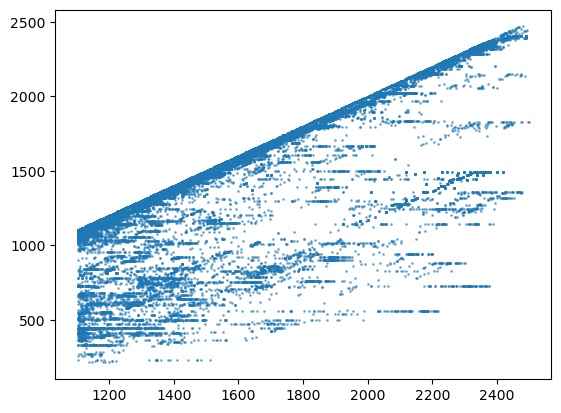

In [20]:
import matplotlib.pyplot as plt

plt.scatter(HSP_lengths, longest_ORF, alpha = 0.5, s = 1)
plt.show()

In [23]:
import numpy as np

ORF_r = np.corrcoef(HSP_lengths, longest_ORF) # Pearson correlation coefficients
ORF_r

array([[1.        , 0.71595949],
       [0.71595949, 1.        ]])

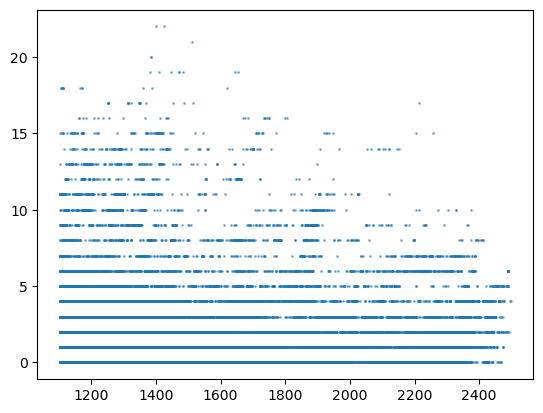

In [21]:
plt.scatter(HSP_lengths, STOP_codons, alpha = 0.5, s = 1)
plt.show()

In [24]:
STOP_r = np.corrcoef(HSP_lengths, STOP_codons) # Pearson correlation coefficients
STOP_r

array([[ 1.        , -0.13053115],
       [-0.13053115,  1.        ]])

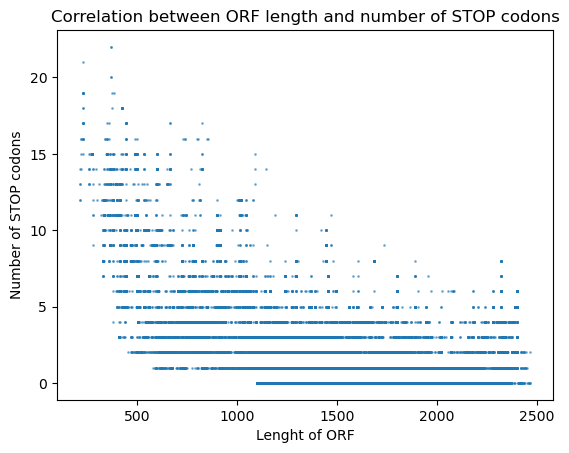

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
plt.scatter(longest_ORF, STOP_codons, alpha = 0.5, s = 1)
plt.title("Correlation between ORF length and number of STOP codons")
plt.xlabel("Lenght of ORF")
plt.ylabel("Number of STOP codons")
plt.show()
plt.savefig("/home/vartotojas/DATA/orthomyxoviridae/PB1/Figure1")

In [6]:
from scipy import stats

stats.spearmanr(longest_ORF, STOP_codons)

SignificanceResult(statistic=-0.5026281268437912, pvalue=0.0)

Clustering sequences before aligning with MAFFT.

In [ ]:
%%bash

cd-hit -i arthropoda-PB1-EVE.fasta -o arthropoda-clustered/arthropoda-PB1-EVE-clstrs -c 1

1174 clusters

In [5]:
arthropoda_clustered = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-EVE2-clstrs.clstr"

with open(arthropoda_clustered, "r") as clusters:
    c = clusters.readlines()
arthropoda_ID_lines = [e for e in c if e.endswith("*\n")]
arthropoda_IDs = [e.split(", >")[1].split("...")[0] for e in arthropoda_ID_lines]
arthropoda_IDs

['OX376305.1|218|Fwd_',
 'OX376305.1|218|Fwd_',
 'OX376305.1|218|Fwd_',
 'OX376305.1|218|Rev_',
 'OX376305.1|218|Rev_',
 'OX376305.1|218|Rev_',
 'LR990212.1|45|Fwd_0',
 'LR990212.1|45|Fwd_1',
 'LR990212.1|45|Fwd_2',
 'LR990212.1|45|Rev_0',
 'LR990212.1|45|Rev_1',
 'LR990212.1|45|Rev_2',
 'OX411715.1|2|Fwd_0',
 'OX411715.1|2|Fwd_1',
 'OX411715.1|2|Fwd_2',
 'OX411715.1|2|Rev_0',
 'OX411715.1|2|Rev_1',
 'OX411715.1|2|Rev_2',
 'OX411715.1|16|Fwd_0',
 'OX411715.1|16|Fwd_1',
 'OX411715.1|16|Fwd_2',
 'OX411715.1|16|Rev_0',
 'OX411715.1|16|Rev_1',
 'OX411715.1|16|Rev_2',
 'OX411715.1|24|Fwd_0',
 'OX411715.1|24|Fwd_1',
 'OX411715.1|24|Fwd_2',
 'OX411715.1|24|Rev_0',
 'OX411715.1|24|Rev_2',
 'OX411715.1|63|Fwd_0',
 'OX411715.1|63|Fwd_1',
 'OX411715.1|63|Fwd_2',
 'OX411715.1|63|Rev_0',
 'OX411715.1|63|Rev_1',
 'OX411715.1|63|Rev_2',
 'OX411715.1|100|Fwd_',
 'OX411715.1|100|Fwd_',
 'OX411715.1|100|Fwd_',
 'OX411715.1|100|Rev_',
 'OX411715.1|100|Rev_',
 'OX411715.1|171|Fwd_',
 'OX411715.1|171|Fwd_'

In [6]:
len(arthropoda_IDs)

6934

In [7]:
arthropoda_path = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-EVE2.fasta"
arthropoda_clstrs = "/home/vartotojas/DATA/orthomyxoviridae/arthropoda-PB1-EVE2-candidates.fasta"

for i in arthropoda_IDs:
    with open(arthropoda_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if line.find(f"{i}") != -1:
                header = lines.index(line)
                seq = lines.index(line) + 1
                with open(arthropoda_clstrs, "a") as fi:
                    fi.write(f"{lines[header]}{lines[seq]}")

KeyboardInterrupt: 

In [36]:
with open(arthropoda_clstrs, "r") as f:
    lines = f.readlines()
print(len(lines), len(lines)/2)

2342 1171.0


In [5]:
with open("/home/vartotojas/DATA/orthomyxoviridae/Orthomyxoviridae_PB1.fasta", "r") as f:
    contents = f.read()
    with open("/home/vartotojas/DATA/orthomyxoviridae/Orthomyxoviridae-PB1.fasta", "a") as new_f:
        new_f.write(contents.replace(" ", "_"))

In [ ]:
%%bash
cat arthropoda-PB1-EVE-unique.fasta Orthomyxoviridae-PB1.fasta > arthropoda-orthomyxo.fasta

Choosing local alignment (suitable for more divergent or distantly related sequences).

In [ ]:
%%bash
linsi arthropoda_clstrs2.fasta > arthropoda_clstrs_aligned.mafft

In [ ]:
%%bash
ginsi arthropoda-orthomyxo.fasta > arthropoda-orthomyxo-mafft/arthropoda-orthomyxo-ginsi.fasta

In [ ]:
%%bash
iqtree2 -s arthropoda-orthomyxo-mafft/arthropoda-orthomyxo-ginsi.fasta -m MFP -T AUTO